| Library/Function                                         | Description                                                                                                                                                      |
|----------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `numpy as np`                                            | Library for multi-dimensional arrays and matrices, along with mathematical functions.                                                                           |
| `pandas as pd`                                           | Library for data manipulation and analysis, providing data structures and operations for manipulating numerical tables and time series.                         |
| `seaborn as sns`                                         | Statistical data visualization library based on matplotlib, providing a high-level interface for drawing attractive and informative graphics.                     |
| `matplotlib.pyplot as plt`                               | Comprehensive library for creating static, animated, and interactive visualizations in Python.                                                                 |
| `from pylab import rcParams`                             | Dictionary-like object in matplotlib that stores default settings for figure size, line width, font properties, etc.                                             |
| `from sklearn.model_selection import train_test_split`   | Function to split arrays or matrices into random train and test subsets.                                                                                        |
| `from imblearn.over_sampling import RandomOverSampler`  | Method for handling imbalanced datasets by oversampling the minority class(es).                                                                                 |
| `from sklearn.compose import ColumnTransformer`          | Class for transforming different columns or column subsets of the input separately.                                                                            |
| `from sklearn.pipeline import Pipeline`                  | Class for sequentially applying a list of transforms and a final estimator.                                                                                    |
| `from sklearn.preprocessing import StandardScaler, OneHotEncoder` | Classes for standardizing features and converting categorical variables into dummy variables.                                                               |
| `from xgboost import XGBClassifier`                      | Optimized distributed gradient boosting library designed for efficiency and flexibility.                                                                      |
| `from sklearn.tree import DecisionTreeClassifier`         | Class for performing multi-class classification using decision trees.                                                                                          |
| `from sklearn.metrics import classification_report`      | Function to build a text report showing the main classification metrics.                                                                                       |
| `from sklearn.model_selection import GridSearchCV`       | Class for finding the best parameters for a model.                                                                                                              |
| `import joblib`                                          | Tools for lightweight pipelining in Python.                                                                                                                     |
| `from scipy.stats import chi2_contingency`               | Function for computing the chi-square statistic and p-value for the independence test of observed frequencies.                                                  |
| `from sklearn.impute import SimpleImputer`                | Class for completing missing values in a dataset.                                                                                                               |
| `from sklearn.preprocessing import FunctionTransformer`  | Class for applying a user-defined function to the data.                                                                                                         |
| `from sklearn.metrics import roc_curve, auc`             | Functions for computing ROC curve and AUC.                                                                                                                      |
| `from sklearn.ensemble import RandomForestClassifier`     | Meta-estimator for fitting decision tree classifiers and improving predictive accuracy.                                                                        |
| `sns.set_palette('Set2')`                                | Sets the color palette for seaborn plots.                                                                                                                       |
| `rcParams['figure.figsize'] = 8, 8`                      | Sets the default figure size for matplotlib plots.                                                                                                              |
| `sns.set_style('darkgrid')`                              | Sets the aesthetic style of the plots.                                                                                                                          |
| `import warnings`                                        | Allows handling warnings.                                                                                                                                       |
| `warnings.filterwarnings("ignore")`                      | Ignores warnings to avoid cluttering the output.                                                                                                                |
| `%matplotlib inline`                                     | Magic command in Jupyter notebooks to display matplotlib plots inline.                                                                                         |

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score, precision_recall_curve, f1_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import chi2_contingency
from sklearn.impute import SimpleImputer
import joblib
import warnings
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

sns.set_palette('Set2')
rcParams['figure.figsize'] = 8, 8
sns.set_style('darkgrid')

warnings.filterwarnings("ignore")
%matplotlib inline


| Function                                        | Description                                                                                                                                                               |
|-------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `pd.set_option('display.max_rows', 500)`        | Set the maximum number of rows to display when a DataFrame is printed.                                                                                                    |
| `pd.set_option('display.max_columns', 100)`     | Set the maximum number of columns to display when a DataFrame is printed.                                                                                                 |
| `pd.set_option('display.max_colwidth', 100)`    | Set the maximum width of columns to display when a DataFrame is printed. Columns wider than this will be truncated with an ellipsis.                                      |

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', 100)

| Code                                                | Description                                                                                                                                                                                                                           |
|-----------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `with open('DataSet\\Train.csv', 'r') as file:`    | Opens the file 'Train.csv' in read mode ('r') and assigns it to the variable `file`. The `with` statement ensures that the file is properly closed after its suite finishes, even if an exception is raised during the execution. |
| `train = file.read()`                              | Reads the contents of the file `file` and assigns it to the variable `train` as a string.                                                                                                                                              |
| `train = pd.read_csv('DataSet\\Train.csv')`        | Reads the CSV file 'Train.csv' located in the 'DataSet' directory and assigns it to the variable `train` as a pandas DataFrame.                                                                                                      |
| `test = pd.read_csv('DataSet\\Test.csv')`          | Reads the CSV file 'Test.csv' located in the 'DataSet' directory and assigns it to the variable `test` as a pandas DataFrame.                                                                                                        |
| `submission = pd.read_csv('DataSet\\SampleSubmission.csv')` | Reads the CSV file 'SampleSubmission.csv' located in the 'DataSet' directory and assigns it to the variable `submission` as a pandas DataFrame.                                                                                |

In [4]:
with open('DataSet\\Train.csv', 'r') as file:
    train = file.read()
train = pd.read_csv('DataSet\\Train.csv')
test=  pd.read_csv('DataSet\\Test.csv')
submission = pd.read_csv('DataSet\\SampleSubmission.csv')
print(train.head())

                                    user_id       REGION        TENURE  \
0  7ee9e11e342e27c70455960acc80d3f91c1286d1        DAKAR  K > 24 month   
1  50443f42bdc92b10388fc56e520e4421a5fa655c          NaN  K > 24 month   
2  da90b5c1a9b204c186079f89969aa01cb03c91b2          NaN  K > 24 month   
3  364ec1b424cdc64c25441a444a16930289a0051e  SAINT-LOUIS  K > 24 month   
4  d5a5247005bc6d41d3d99f4ef312ebb5f640f2cb        DAKAR  K > 24 month   

   MONTANT  FREQUENCE_RECH  REVENUE  ARPU_SEGMENT  FREQUENCE  DATA_VOLUME  \
0  20000.0            47.0  21602.0        7201.0       52.0       8835.0   
1      NaN             NaN      NaN           NaN        NaN          NaN   
2      NaN             NaN      NaN           NaN        NaN          NaN   
3   7900.0            19.0   7896.0        2632.0       25.0       9385.0   
4  12350.0            21.0  12351.0        4117.0       29.0       9360.0   

   ON_NET  ORANGE   TIGO  ZONE1  ZONE2 MRG  REGULARITY  \
0  3391.0   396.0  185.0    NaN   

| Code                                                    | Description                                                                                                                                                                                                                                                                                       |
|---------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `train.shape`                                           | Returns the shape of the `train` DataFrame as a tuple, where the first element is the number of rows and the second element is the number of columns.                                                                                                                                        |
| `train.info()`                                          | Prints a concise summary of the `train` DataFrame, including the data type of each column and the number of non-null values.                                                                                                                                                                    |
| `train.describe().transpose()`                          | Computes descriptive statistics of the `train` DataFrame and then transposes the result (swaps rows and columns) for easier reading. The statistics include count, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum values. |
| `test.head()`                                           | Returns the first 5 rows of the `test` DataFrame.                                                                                                                                                                                                                                                |
| `test.tail()`                                           | Returns the last 5 rows of the `test` DataFrame.                                                                                                                                                                                                                                                 |
| `test.shape`                                            | Returns the shape of the `test` DataFrame as a tuple, where the first element is the number of rows and the second element is the number of columns.                                                                                                                                         |
| `test.info()`                                           | Prints a concise summary of the `test` DataFrame, including the data type of each column and the number of non-null values.                                                                                                                                                                     |
| `test.describe().transpose()`                           | Computes descriptive statistics of the `test` DataFrame and then transposes the result (swaps rows and columns) for easier reading. The statistics include count, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum values.  |

In [5]:
train.tail()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
1077019,56e22fe3312a48cf860b043a021dab275383a20a,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,16,NaN,NaN,0
1077020,587b72930e4d36b3fb94a18c3ef65c2079460eee,TAMBACOUNDA,K > 24 month,2500.0,5.0,2500.0,833.0,5.0,0.0,15.0,77.0,NaN,NaN,NaN,NO,34,All-net 500F=2000F;5d,2.0,0
1077021,d6831b8edacb7d9928b3f053fb1283574577ae42,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,3,NaN,NaN,1
1077022,cb1f6510b084173c0deae49095f35ac29f916701,NaN,K > 24 month,600.0,1.0,600.0,200.0,1.0,591.0,11.0,37.0,5.0,1.0,NaN,NO,16,All-net 600F= 3000F ;5d,1.0,0
1077023,28f56fd0d9f8d8647bb6c62e7a3f4f35f49f4d6f,FATICK,K > 24 month,1500.0,4.0,1499.0,500.0,5.0,1265.0,30.0,4.0,NaN,NaN,0.0,NO,50,On net 200F=Unlimited _call24H,2.0,0


In [6]:
train.shape

(1077024, 19)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077024 entries, 0 to 1077023
Data columns (total 19 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   user_id         1077024 non-null  object 
 1   REGION          652687 non-null   object 
 2   TENURE          1077024 non-null  object 
 3   MONTANT         699139 non-null   float64
 4   FREQUENCE_RECH  699139 non-null   float64
 5   REVENUE         714669 non-null   float64
 6   ARPU_SEGMENT    714669 non-null   float64
 7   FREQUENCE       714669 non-null   float64
 8   DATA_VOLUME     547261 non-null   float64
 9   ON_NET          683850 non-null   float64
 10  ORANGE          629880 non-null   float64
 11  TIGO            432250 non-null   float64
 12  ZONE1           84898 non-null    float64
 13  ZONE2           68794 non-null    float64
 14  MRG             1077024 non-null  object 
 15  REGULARITY      1077024 non-null  int64  
 16  TOP_PACK        626129 non-null   ob

In [8]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MONTANT,699139.0,5529.210895,7104.737952,20.0,1000.0,3000.0,7350.0,470000.0
FREQUENCE_RECH,699139.0,11.523756,13.261938,1.0,2.0,7.0,16.0,131.0
REVENUE,714669.0,5506.050798,7175.625010,1.0,1000.0,3000.0,7360.0,532177.0
ARPU_SEGMENT,714669.0,1835.355961,2391.870902,0.0,333.0,1000.0,2453.0,177392.0
FREQUENCE,714669.0,13.974439,14.687059,1.0,3.0,9.0,20.0,91.0
DATA_VOLUME,547261.0,3368.801722,12898.928039,0.0,0.0,258.0,2905.0,1702309.0
ON_NET,683850.0,277.065798,874.315378,0.0,5.0,27.0,156.0,50809.0
ORANGE,629880.0,95.160804,203.020261,0.0,7.0,29.0,99.0,12040.0
TIGO,432250.0,23.105018,64.035464,0.0,2.0,6.0,20.0,4174.0
ZONE1,84898.0,8.167483,39.245883,0.0,0.0,1.0,3.0,2507.0


In [9]:
test.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,51fe4c3347db1f8571d18ac03f716c41acee30a4,MATAM,I 18-21 month,2500.0,5.0,2500.0,833.0,5.0,0.0,64.0,70.0,NaN,NaN,NaN,NO,35,All-net 500F=2000F;5d,5.0
1,5ad5d67c175bce107cc97b98c4e37dcc38aa7f3e,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2,NaN,NaN
2,5a4db591c953a8d8f373877fad37aaf4268899a1,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NO,22,NaN,NaN
3,8bf9b4d8880aeba1c9a0da48be78f12e629be37c,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,6,NaN,NaN
4,c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df,SAINT-LOUIS,K > 24 month,5100.0,7.0,5637.0,1879.0,15.0,7783.0,30.0,24.0,0.0,0.0,NaN,NO,60,"Data:1000F=2GB,30d",4.0


In [10]:
test.tail()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
190058,1092956a3dad77ceb7e8d7c70e3e13f77b60e2aa,DAKAR,F 9-12 month,500.0,1.0,506.0,169.0,1.0,0.0,26.0,NaN,NaN,6.0,NaN,NO,14,All-net 500F=2000F;5d,1.0
190059,bec10becca7faa8e9cab9981b3aee5e9a7f04828,DAKAR,K > 24 month,2000.0,4.0,2000.0,667.0,5.0,0.0,8.0,54.0,NaN,NaN,NaN,NO,29,All-net 500F =2000F_AllNet_Unlimited,3.0
190060,7ac6fc191f8732b1b146e57f9ede983626b93eae,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2,NaN,NaN
190061,d592c81971d6120b0d19f9ace85f278ea21b89a0,NaN,K > 24 month,300.0,2.0,298.0,99.0,2.0,0.0,1.0,2.0,NaN,NaN,NaN,NO,12,NaN,NaN
190062,9b4f57aeef72cd52c634498d0ea27ea3fbb67bf4,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2,NaN,NaN


In [11]:
test.shape

(190063, 18)

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190063 entries, 0 to 190062
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         190063 non-null  object 
 1   REGION          115330 non-null  object 
 2   TENURE          190063 non-null  object 
 3   MONTANT         123695 non-null  float64
 4   FREQUENCE_RECH  123695 non-null  float64
 5   REVENUE         126422 non-null  float64
 6   ARPU_SEGMENT    126422 non-null  float64
 7   FREQUENCE       126422 non-null  float64
 8   DATA_VOLUME     96716 non-null   float64
 9   ON_NET          120771 non-null  float64
 10  ORANGE          111417 non-null  float64
 11  TIGO            76555 non-null   float64
 12  ZONE1           14850 non-null   float64
 13  ZONE2           12011 non-null   float64
 14  MRG             190063 non-null  object 
 15  REGULARITY      190063 non-null  int64  
 16  TOP_PACK        110773 non-null  object 
 17  FREQ_TOP_P

In [13]:
test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MONTANT,123695.0,5506.547759,7063.107301,25.0,1000.0,3000.0,7300.0,201500.0
FREQUENCE_RECH,123695.0,11.483940,13.181700,1.0,2.0,7.0,16.0,120.0
REVENUE,126422.0,5486.233417,7130.567766,1.0,1000.0,3000.0,7319.0,177322.0
ARPU_SEGMENT,126422.0,1828.750281,2376.852027,0.0,333.0,1000.0,2440.0,59107.0
FREQUENCE,126422.0,13.939670,14.623402,1.0,3.0,9.0,19.0,91.0
DATA_VOLUME,96716.0,3358.421151,12024.079200,0.0,0.0,265.0,2888.0,754798.0
ON_NET,120771.0,281.210613,886.496878,0.0,5.0,27.0,156.0,26786.0
ORANGE,111417.0,94.611639,202.594409,0.0,7.0,28.0,98.0,5695.0
TIGO,76555.0,22.952270,64.902240,0.0,2.0,6.0,20.0,3083.0
ZONE1,14850.0,8.135421,46.050513,0.0,0.0,1.0,3.0,3558.0


In [14]:
missing_values= 100 -((train.notnull().sum()/train.shape[0])*100)
missing_values

user_id            0.000000
REGION            39.399029
TENURE             0.000000
MONTANT           35.086033
FREQUENCE_RECH    35.086033
REVENUE           33.644097
ARPU_SEGMENT      33.644097
FREQUENCE         33.644097
DATA_VOLUME       49.187669
ON_NET            36.505593
ORANGE            41.516624
TIGO              59.866261
ZONE1             92.117353
ZONE2             93.612584
MRG                0.000000
REGULARITY         0.000000
TOP_PACK          41.864898
FREQ_TOP_PACK     41.864898
CHURN              0.000000
dtype: float64

| Code                                                         | Description                                                                                                                                                                                                                               |
|--------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `missing_values = 100 - ((test.notnull().sum() / test.shape[0]) * 100)` | Calculates the percentage of missing values in each column of the `test` DataFrame. It first computes the number of non-null values for each column (`test.notnull().sum()`) and divides it by the total number of rows in the `test` DataFrame (`test.shape[0]`). This gives the proportion of non-null values in each column. The result is then multiplied by 100 to convert it to a percentage. Finally, it subtracts this percentage from 100 to obtain the percentage of missing values. |

In [15]:
missing_values= 100 -((test.notnull().sum()/test.shape[0])*100)
missing_values

user_id            0.000000
REGION            39.320120
TENURE             0.000000
MONTANT           34.918948
FREQUENCE_RECH    34.918948
REVENUE           33.484161
ARPU_SEGMENT      33.484161
FREQUENCE         33.484161
DATA_VOLUME       49.113715
ON_NET            36.457385
ORANGE            41.378911
TIGO              59.721250
ZONE1             92.186801
ZONE2             93.680516
MRG                0.000000
REGULARITY         0.000000
TOP_PACK          41.717746
FREQ_TOP_PACK     41.717746
dtype: float64

## Univariate Analysis

This code snippet uses `matplotlib.pyplot` to plot the distribution of customers based on three categorical columns (`MRG`, `TENURE`, and `REGION`) in a dataset (`train`). It iterates through each column, creating a bar chart showing the normalized counts of each unique value in the column. The plot includes a title indicating the column being analyzed and labels for the x and y axes.

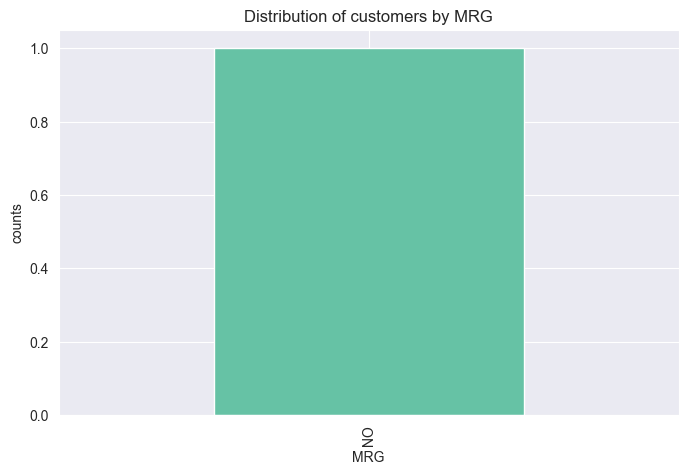

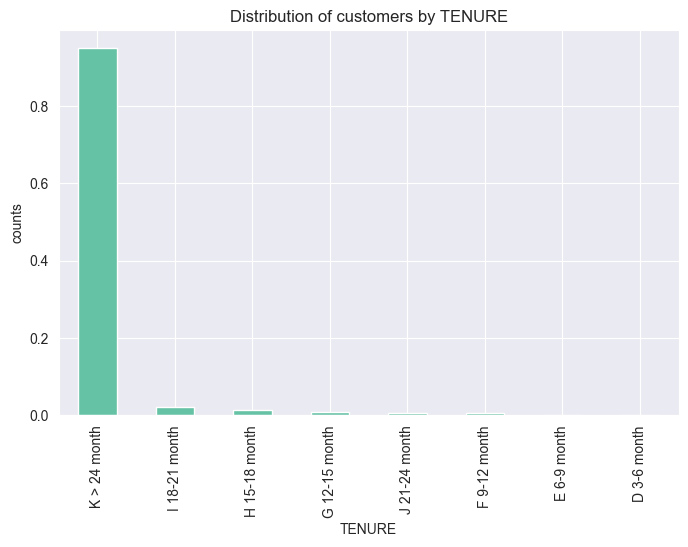

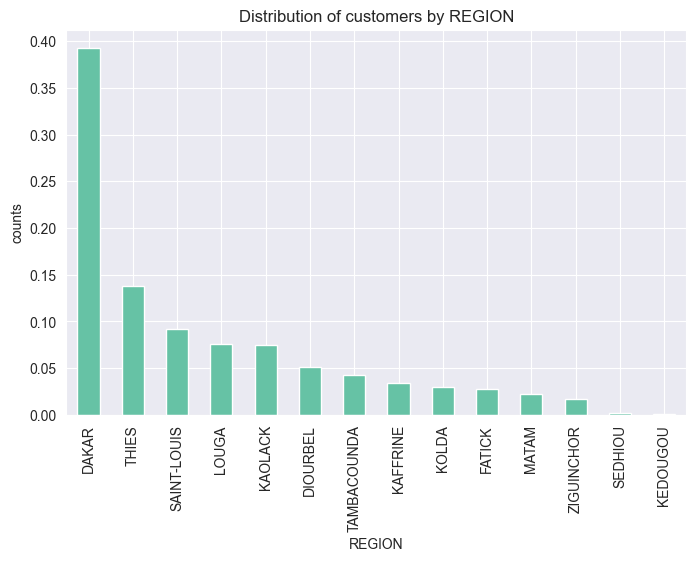

In [16]:
columns = ['MRG', 'TENURE', 'REGION']

for column in columns:
    plt.figure(figsize=(8, 5))
    plt.title(f'Distribution of customers by {column}')
    train[column].value_counts(normalize=True).plot(kind='bar')
    plt.ylabel('counts')
    plt.xlabel(column)
    plt.show()


| Code                                                    | Description                                                                                                                                                                                                                     |
|---------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `train.hist(figsize=(15,9));`                    |  Prints out a histograms for each numerical column in the train set, and it sets the size of the overall figure to be 15 inches wide and 9 inches tall. Each histogram represents the distribution of values within a specific column of the dataset.                                                                              |


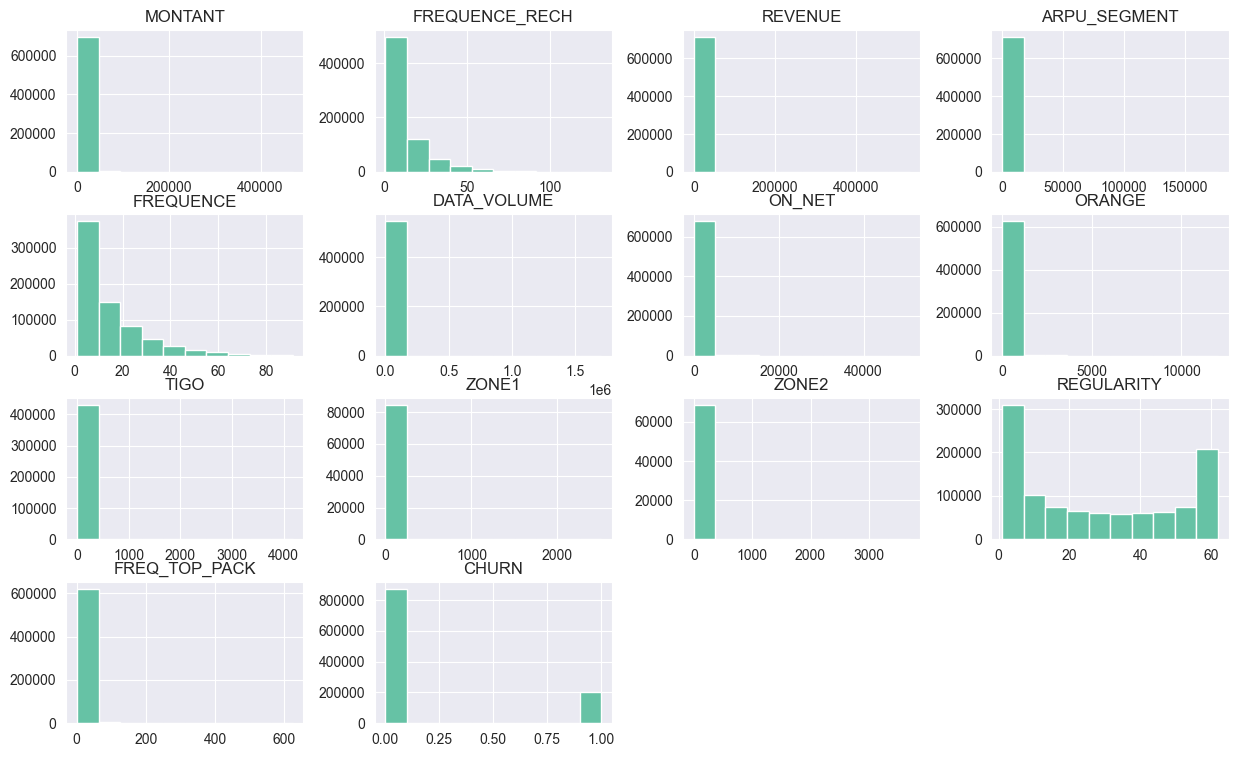

In [17]:
train.hist(figsize=(15,9));

| Code                                                    | Description                                                                                                                                                                                                                     |
|---------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `churn_counts = train['CHURN'].value_counts()`                    | Calculates the counts of unique values in the 'CHURN' column of the DataFrame train                                                                                          |
| `churn_counts.plot(kind='bar', figsize=(10,5)`                             | Sets the figure size of the plot to (10, 5) inches.                                                                                                                                                                             |
| `plt.ylabel('Counts') and plt.xlabel('Churn')`         | Sets the labels for the y-axis (counts) and the x-axis (churn), respectively'.                                                                                                                                                              |
| `plt.show()` | Displays the plot. |
                                                                                                                                                                                |

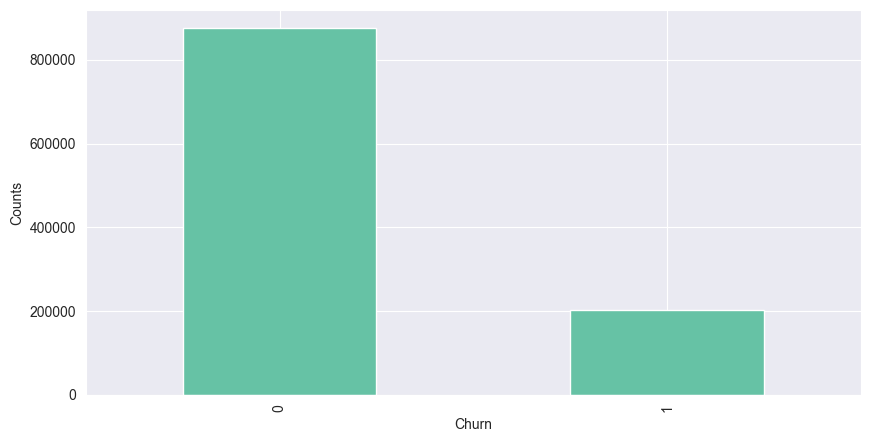

In [18]:
churn_counts = train['CHURN'].value_counts()
churn_counts.plot(kind='bar', figsize=(10,5))
plt.ylabel('Counts')
plt.xlabel('Churn')
plt.show()

| Code                                                    | Description                                                                                                                                                                                                                     |
|---------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `top_pack_counts = train['TOP_PACK'].value_counts().head(top_n)`                    | Calculates the counts of unique values in the 'TOP_PACK' column in the train  dataset.                                                                                     |
| `plt.figure(figsize=(14,6))`                             | Sets the figure size of the plot to (8, 5) inches.                                                                                                                                                     | `plt.bar(top_pack_counts.index, top_pack_counts.values)`         | creates a bar plot using the values and indices (labels) from the top_pack_counts Series. The indices represent the unique values in the 'TOP_PACK' column, and the values represent their respective counts.        |

| `plt.title('Top {top_n} Distribution of customers by TOP_PACK')`         | Sets the title of the plot to 'Distribution of customers by TOP_PACK'.                                                                                                                                                              |
| plt.ylabel('Percentage') and plt.xlabel('TOP_PACK')` | set the labels for the y-axis (Percentage) and the x-axis (TOP_PACK).

| `plt.xticks(rotation=45, ha='right')`                                  | rotates the x-axis labels by 45 degrees to prevent overlap and improve readability. The ha='right' parameter ensures that the labels are aligned to the right for better visibility.                                                                                                                                                                                 |
| `plt.xlabel('MRG')`                                    | Displays the plot .                                                                                                                                                                                 

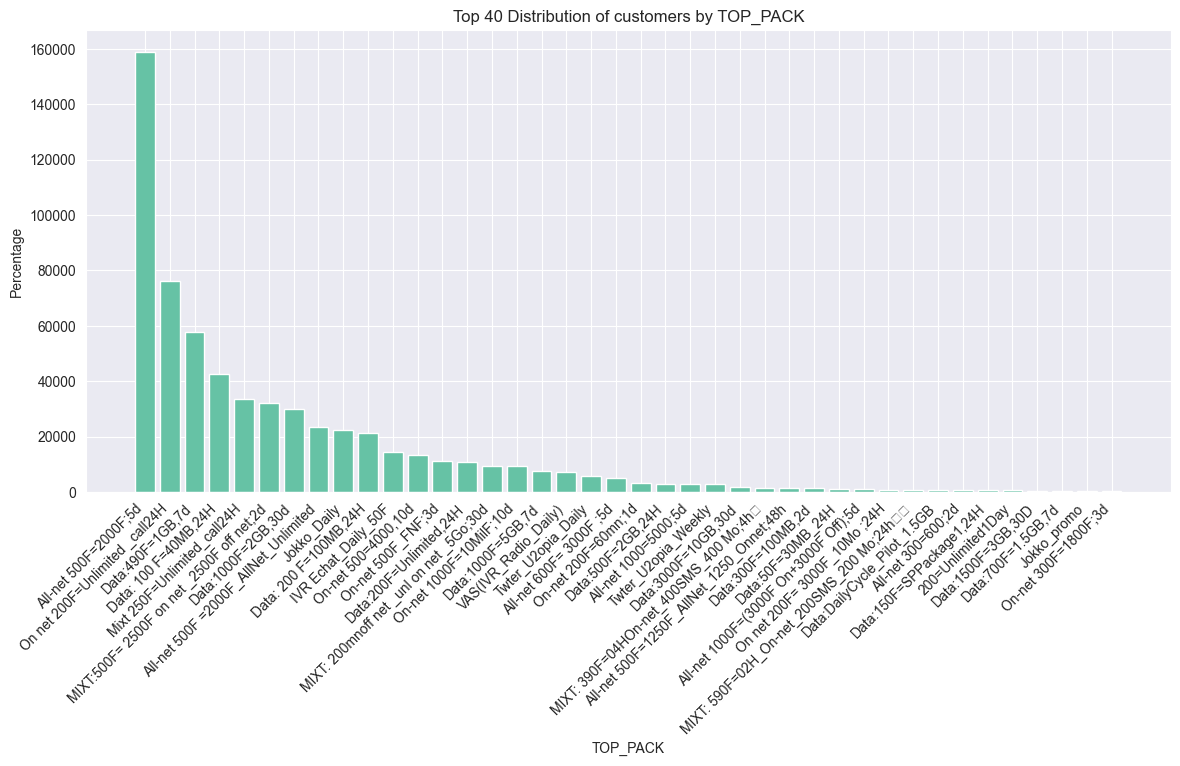

In [19]:
top_n = 40
top_pack_counts = train['TOP_PACK'].value_counts().head(top_n)
plt.figure(figsize=(14, 6))
plt.bar(top_pack_counts.index, top_pack_counts.values)
plt.title(f'Top {top_n} Distribution of customers by TOP_PACK')
plt.ylabel('Percentage')
plt.xlabel('TOP_PACK')
plt.xticks(rotation=45, ha='right')
plt.show()

This code snippet uses `matplotlib.pyplot` and `seaborn` to plot boxplots for each column in a list (`outlier_columns`). For each column, it creates a figure, plots a boxplot of the column's data, and adds a title indicating the column being analyzed. The y-axis is labeled 'Values', and the x-axis ticks are rotated for better readability. Each boxplot shows the distribution of values in the column, helping to identify outliers.

In [20]:
outlier_columns = [
    'MONTANT', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME',
    'ON_NET', 'ORANGE', 'TIGO', 'ZONE1', 'ZONE2', 'REGULARITY', 'FREQ_TOP_PACK'
]

fig, axs = plt.subplots(len(outlier_columns), 1, figsize=(10, len(outlier_columns) * 4))

for i, column in enumerate(outlier_columns):
    sns.boxplot(data=train[column], orient='h', ax=axs[i])
    axs[i].set_title(f'Outliers in {column}')
    axs[i].set_ylabel('Values')
    axs[i].set_xlabel('')

    # Print outliers as text
    q1 = train[column].quantile(0.25)
    q3 = train[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = train[(train[column] < lower_bound) | (train[column] > upper_bound)][column]
    if not outliers.empty:
        axs[i].text(0.95, 0.95, f"Outliers: {', '.join(map(str, outliers))}", ha='right', va='top',
                    transform=axs[i].transAxes, color='red', fontsize=10, bbox=dict(facecolor='none', edgecolor='red', boxstyle='round,pad=0.5'))
    else:
        axs[i].text(0.95, 0.95, "No outliers found", ha='right', va='top',
                    transform=axs[i].transAxes, color='green', fontsize=10, bbox=dict(facecolor='none', edgecolor='green', boxstyle='round,pad=0.5'))

plt.tight_layout()
plt.show()


ValueError: Image size of 4658076x3760 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1000x4800 with 12 Axes>

## Bi-variate Analysis

| Code                                                    | Description                                                                                                                                                                                                                     |
|---------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `correlation = train.corr(numeric_only=True)`                    | calculates the correlation coefficients between all pairs of numerical columns .                                                                                                                                                                                                                                                                          |

In [21]:
correlation = train.corr(numeric_only=True)
correlation

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
MONTANT,1.000000,0.791875,0.976696,0.976696,0.776145,0.307393,0.324712,0.656019,0.409970,0.374499,0.421718,0.522629,0.740936,-0.105110
FREQUENCE_RECH,0.791875,1.000000,0.798738,0.798737,0.955882,0.158125,0.403519,0.519295,0.341645,0.116630,0.125633,0.558206,0.869419,-0.123849
REVENUE,0.976696,0.798738,1.000000,1.000000,0.786208,0.313408,0.329744,0.659143,0.408489,0.384992,0.390504,0.532299,0.751271,-0.114401
ARPU_SEGMENT,0.976696,0.798737,1.000000,1.000000,0.786207,0.313408,0.329744,0.659144,0.408489,0.384992,0.390504,0.532297,0.751270,-0.114402
FREQUENCE,0.776145,0.955882,0.786208,0.786207,1.000000,0.174710,0.392982,0.472755,0.305933,0.110514,0.142466,0.591730,0.845926,-0.139982
DATA_VOLUME,0.307393,0.158125,0.313408,0.313408,0.174710,1.000000,-0.014208,0.061651,0.022279,0.037533,0.044698,0.187996,0.123775,-0.033699
ON_NET,0.324712,0.403519,0.329744,0.329744,0.392982,-0.014208,1.000000,0.219325,0.135288,0.004170,-0.014595,0.269578,0.354593,-0.058102
ORANGE,0.656019,0.519295,0.659143,0.659144,0.472755,0.061651,0.219325,1.000000,0.400364,0.050091,0.031593,0.311036,0.553373,-0.064132
TIGO,0.409970,0.341645,0.408489,0.408489,0.305933,0.022279,0.135288,0.400364,1.000000,0.013983,0.026644,0.192935,0.369987,-0.035993
ZONE1,0.374499,0.116630,0.384992,0.384992,0.110514,0.037533,0.004170,0.050091,0.013983,1.000000,0.042970,0.045154,0.190099,0.009309


| Code                                                    | Description                                                                                                                                                                                                                     |
|---------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `data = train[['REGULARITY', 'CHURN', 'REVENUE', 'FREQUENCE'`                    | Selects a subset of columns from the train DataFrame, including 'REGULARITY', 'CHURN', 'REVENUE', and 'FREQUENCE', and assigns it to a new DataFrame called data.                                                                                          |
| `sns.pairplot(data, palette={1: 'seagreen', 0: 'skyblue'}, hue='CHURN')`                             |Creates a pairplot using Seaborn's pairplot() function. A pairplot displays pairwise relationships between variables in a grid of scatterplots.                                                                 

| `plt.show()`                                    |Displays the plot.                                                                                                                                                                                   |

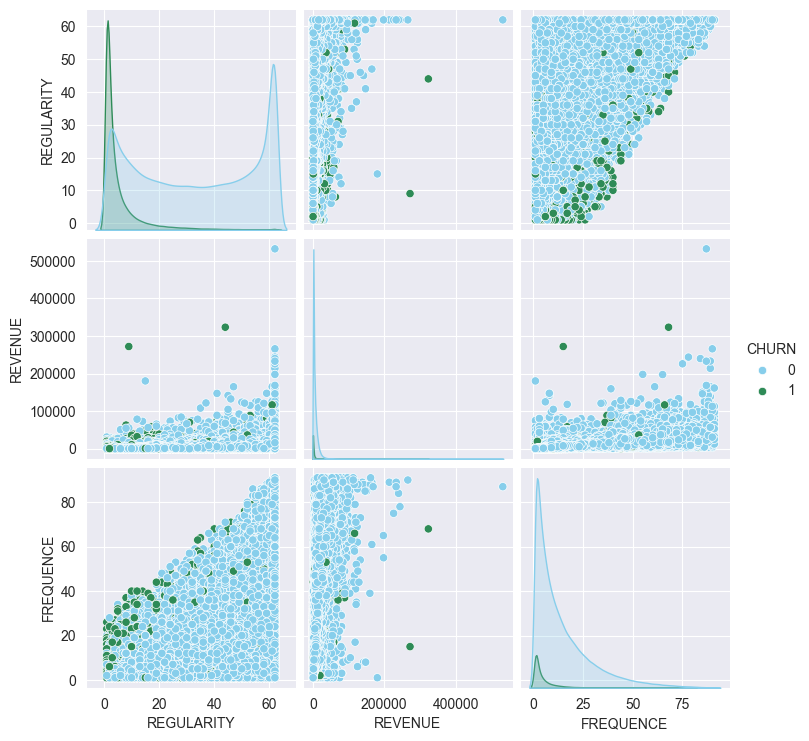

In [22]:
data=train[['REGULARITY', 'CHURN','REVENUE','FREQUENCE']]
sns.pairplot(data, palette= {1:'seagreen', 0:'skyblue'}, hue = 'CHURN')
plt.show()

## Multivariate Analysis

| Code                                                    | Description                                                                                                                                                                                                                     |
|---------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `outlier_columns = ['FREQUENCE_RECH', 'FREQUENCE', 'REGULARITY']`                    | Defines a list outlier_columns containing the names of the columns for which outliers are to be detected and visualized. In this case, it includes 'FREQUENCE_RECH', 'FREQUENCE', and 'REGULARITY'.                                                                                          |
| `plt.figure(figsize=(10,6))`                             | Sets the figure size of the plot to (10, 6) inches.                                                                                                                                                                             |
| `sns.boxplot(data=train[outlier_columns])`         | Creates a box plot using Seaborn's boxplot() function.                                                                                                                                                              |
| `plt.title('Outliers in columns')` | Sets the title of the plot to 'Outliers in columns'. |
| `plt.ylabel('Values')`                                  | Sets the y-axis label of the plot to 'values'.                                                                                                                                                                                 |
| `plt.xticks(rotation=45)`                                    |  Rotates the 
x-axis labels by 45 degrees for better readability. 


| `plt.show()`                                    |Displays the plot.                                                                                                                                                                                   |

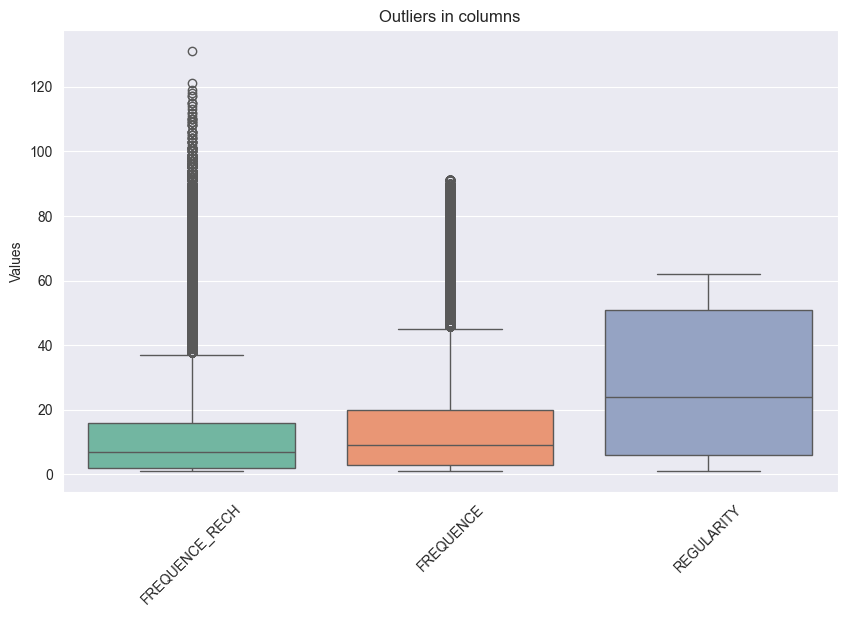

Outliers in FREQUENCE_RECH:
0          47.0
61         50.0
63         40.0
81         39.0
96         38.0
           ... 
1076864    97.0
1076871    39.0
1076901    40.0
1076917    46.0
1077011    44.0
Name: FREQUENCE_RECH, Length: 40024, dtype: float64
Outliers in FREQUENCE:
0          52.0
11         46.0
18         81.0
61         51.0
100        49.0
           ... 
1076763    48.0
1076841    48.0
1076864    90.0
1076917    47.0
1077011    46.0
Name: FREQUENCE, Length: 34892, dtype: float64
No outliers found in REGULARITY


In [23]:
outlier_columns = ['FREQUENCE_RECH', 'FREQUENCE', 'REGULARITY']

plt.figure(figsize=(10, 6))
sns.boxplot(data=train[outlier_columns])
plt.title('Outliers in columns')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

for column in outlier_columns:
    q1 = train[column].quantile(0.25)
    q3 = train[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = train[(train[column] < lower_bound) | (train[column] > upper_bound)][column]
    if not outliers.empty:
        print(f"Outliers in {column}:")
        print(outliers)
    else:
        print(f"No outliers found in {column}")


| Code                                                    | Description                                                                                                                                                                                                                     |
|---------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `plt.title()`                    | Sets the title of the plot.                                                                                          |
| `plt.xlabel() and plt.ylabel()`                             | Sets the figure size of the plot to (10, 6) inches.                                                                                                                                                                             |
| `sns.jointplot(data=train, x='FREQUENCE', y='REVENUE', kind='reg')`         |Creates a joint plot using Seaborn's jointplot() function. It displays both a scatter plot and histograms for the 'FREQUENCE' and 'REVENUE' columns, with a regression line fitted to the data.                                                                                                                                                              |
| `sns.pairplot(train[['REVENUE', 'FREQUENCE']])` | Creates a pair plot using Seaborn's pairplot() function. It displays pairwise scatter plots for the selected columns ('REVENUE' and 'FREQUENCE')  |

| `plt.ylabel('Values')`                                  | Sets the y-axis label of the plot to 'values'.                                                                                                                                                                                 |


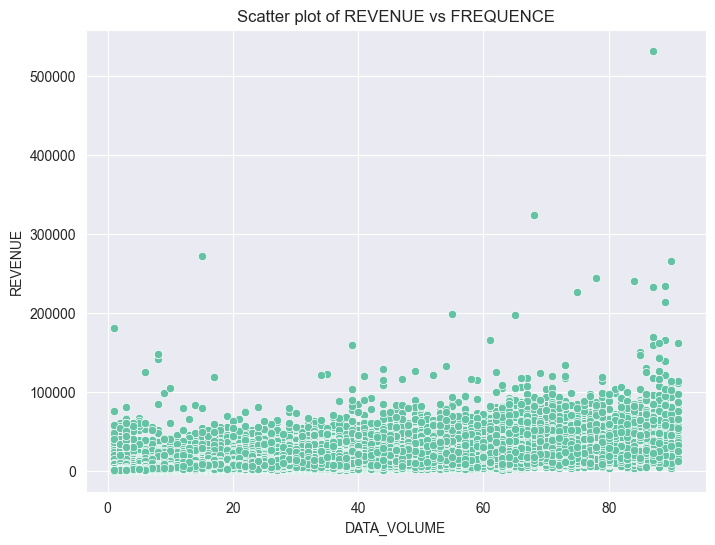

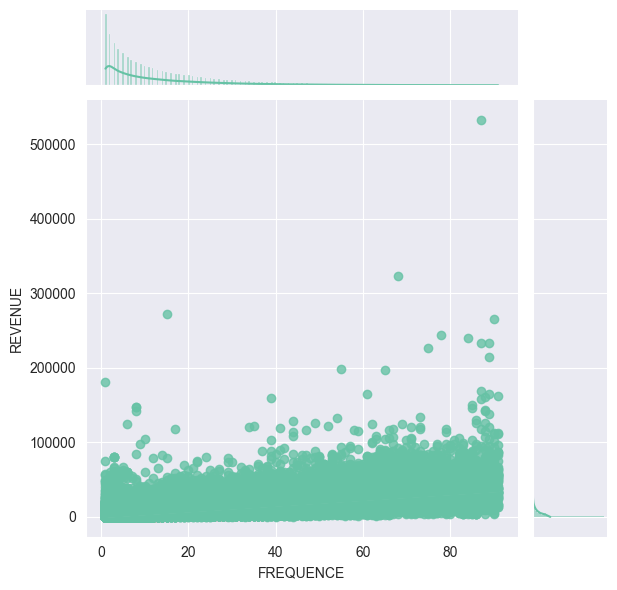

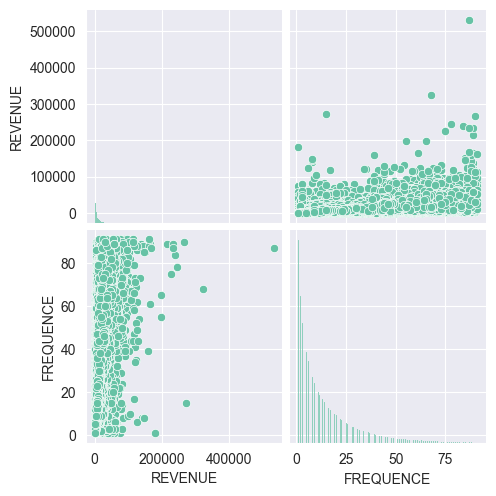

In [24]:

plt.figure(figsize=(8, 6))
sns.scatterplot(data=train, x='FREQUENCE', y='REVENUE')
plt.title('Scatter plot of REVENUE vs FREQUENCE')
plt.xlabel('DATA_VOLUME')
plt.ylabel('REVENUE')
plt.show()

sns.jointplot(data=train, x='FREQUENCE', y='REVENUE', kind='reg')
plt.show()
sns.pairplot(train[['REVENUE', 'FREQUENCE']])
plt.show()

## Hypothesis Testing

| Hypothesis | Null Hypothesis (H0) | Alternative Hypothesis (H1) |
|------------|-----------------------|-----------------------------|
| 1. Customer Region and Churn Rate | A customers region will not affect churn rate | A customer's region will affect churn rate . |
| 2. Customer Tenure and Churn Rate | There is no significant relationship between customer tenure and churn rate. | Customers with longer tenure are less likely to churn compared to those with shorter tenure. |

In [25]:
region_churn = train[['REGION', 'CHURN']]
contingency_table = pd.crosstab(region_churn['REGION'], region_churn['CHURN']) 
chi2, p, dof, expected = chi2_contingency(contingency_table) 
alpha = 0.05

if p < alpha:
    print("Reject the null hypothesis: There is a significant relationship between customer region and churn rate.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between customer region and churn rate.")


Reject the null hypothesis: There is a significant relationship between customer region and churn rate.


In [26]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(train['TENURE'], train['CHURN'])
chi2, p, _, _ = chi2_contingency(contingency_table)
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant relationship between customer tenure and churn rate.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between customer tenure and churn rate.")


Reject the null hypothesis: There is a significant relationship between customer tenure and churn rate.


## Analytical Questions

1. 1. What is the overall churn rate for Expresso Telecom?



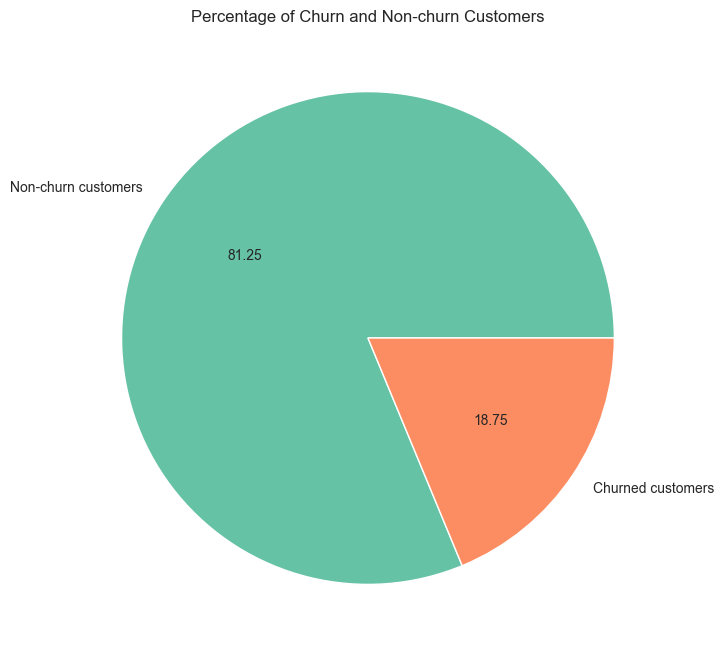

In [27]:
count_of_churn_customers = train['CHURN'].value_counts()
labels = ['Non-churn customers', 'Churned customers']
 
count_of_churn_customers.plot(kind='pie', autopct='%.2f', labels=labels)
plt.title('Percentage of Churn and Non-churn Customers')
plt.ylabel('') 
plt.show()

2. Which top 5 packages have more customer subscription ?

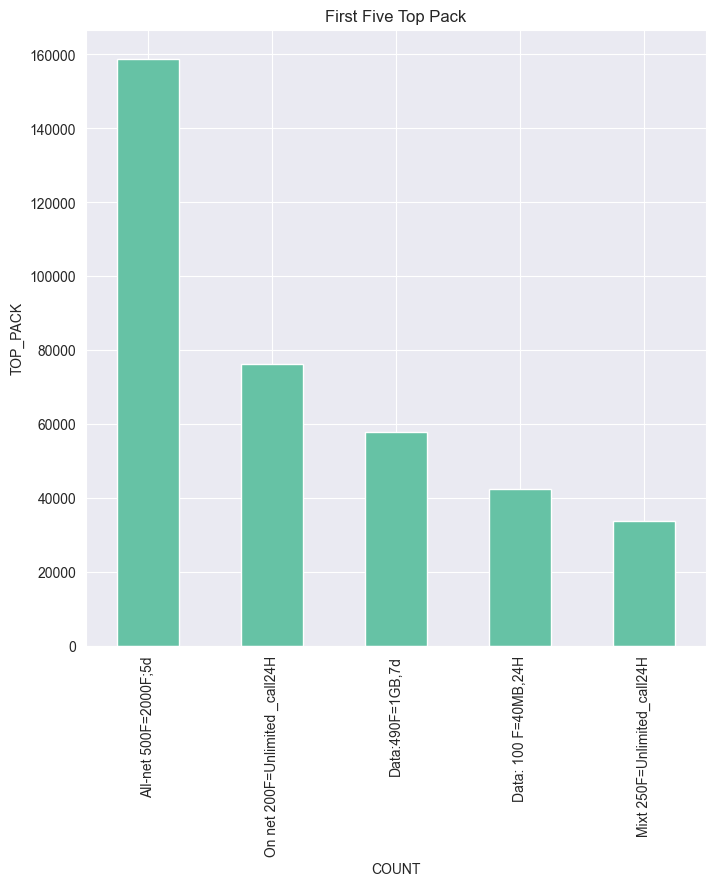

In [28]:
first_five_top_pack = train['TOP_PACK'].value_counts().head(5)
first_five_top_pack

first_five_top_pack.plot(kind='bar')
plt.title('First Five Top Pack')
plt.xlabel('COUNT')
plt.ylabel('TOP_PACK')
plt.show()

3. How does customer tenure vary among churned and non-churned customers?

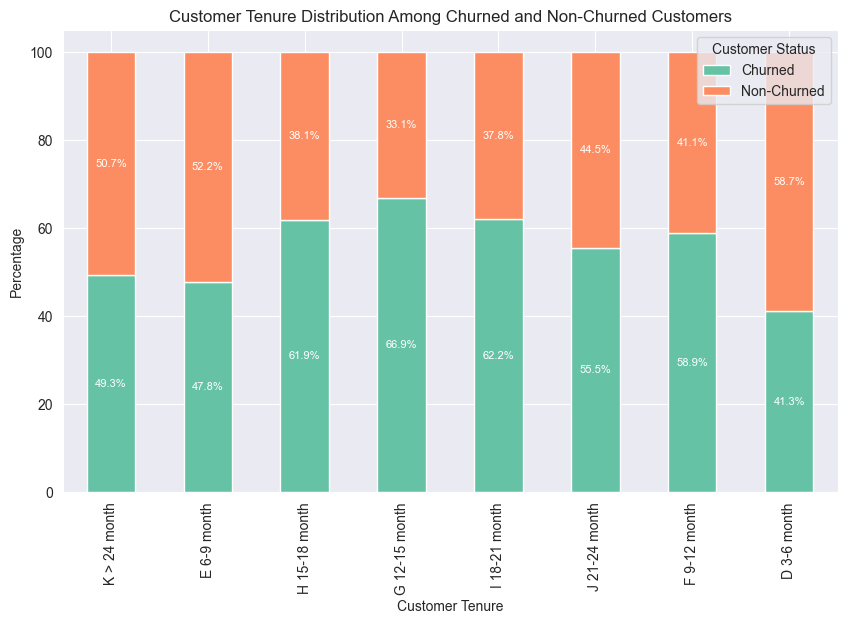

In [29]:
churned_customers = train[train['CHURN'] == 1]
non_churned_customers = train[train['CHURN'] == 0]
 
churned_tenure_counts = churned_customers['TENURE'].value_counts(normalize=True) * 100
non_churned_tenure_counts = non_churned_customers['TENURE'].value_counts(normalize=True) * 100
 
tenure_counts = pd.DataFrame({'Churned': churned_tenure_counts, 'Non-Churned': non_churned_tenure_counts})
 
all_tenure_categories = train['TENURE'].unique()
tenure_counts = tenure_counts.reindex(all_tenure_categories, fill_value=0)

tenure_counts['Total'] = tenure_counts['Churned'] + tenure_counts['Non-Churned']
tenure_counts['Churned'] = (tenure_counts['Churned'] / tenure_counts['Total']) * 100
tenure_counts['Non-Churned'] = (tenure_counts['Non-Churned'] / tenure_counts['Total']) * 100
 
tenure_counts['Churned Cumulative'] = tenure_counts['Churned'].cumsum()
tenure_counts['Non-Churned Cumulative'] = tenure_counts['Non-Churned'].cumsum()

ax = tenure_counts[['Churned', 'Non-Churned']].plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Customer Tenure')
plt.ylabel('Percentage')
plt.title('Customer Tenure Distribution Among Churned and Non-Churned Customers')
plt.legend(title='Customer Status')

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width > 0:
        ax.annotate(f'{height:.1f}%', (left + width / 2, bottom + height / 2), ha='center', va='center', fontsize=8, color='white')
 
plt.show()

4. How do customers' subscription packages (top packs) relate to their likelihood of churning?

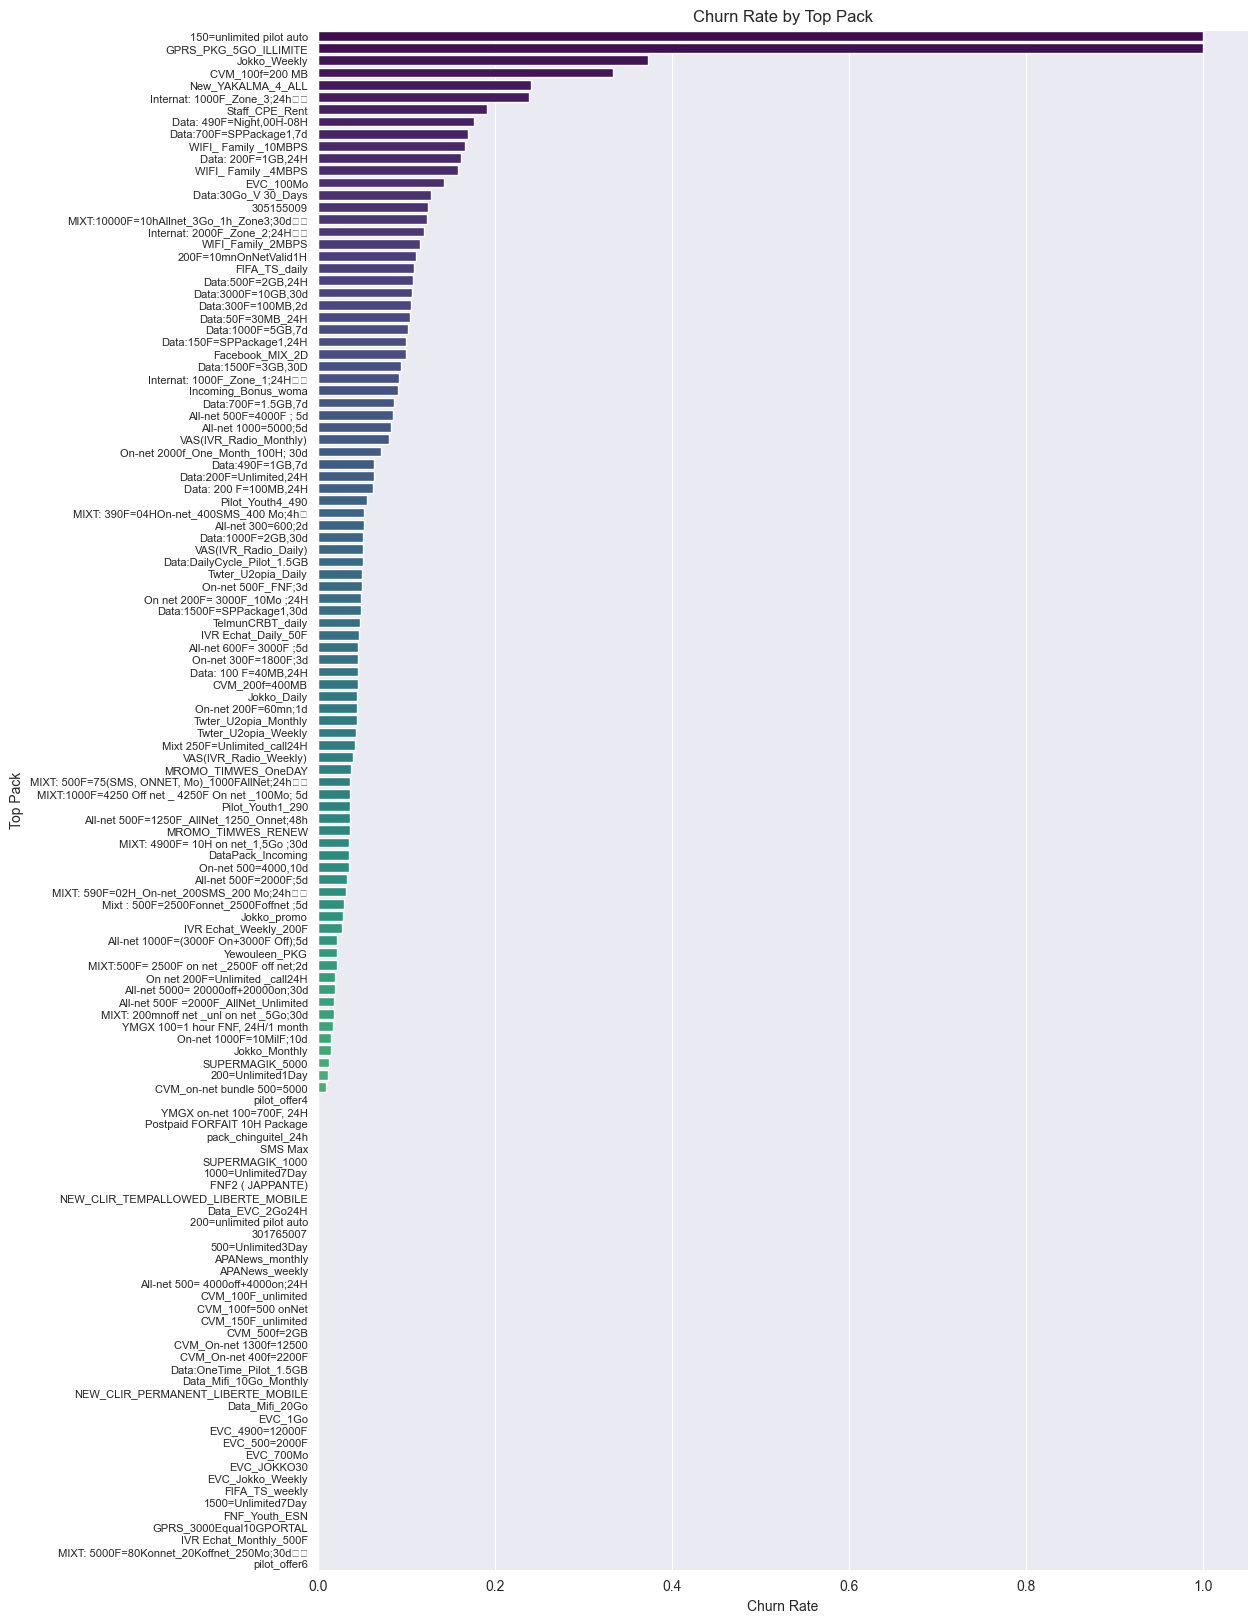

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

churn_rate_by_top_pack = train.groupby('TOP_PACK')['CHURN'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 20))  
sns.barplot(x=churn_rate_by_top_pack.values, y=churn_rate_by_top_pack.index, palette='viridis')
plt.xlabel('Churn Rate')
plt.ylabel('Top Pack')
plt.title('Churn Rate by Top Pack')
plt.tick_params(axis='y', which='major', labelsize=8)
plt.show()


5. How does the churn rate vary across different regions or locations?

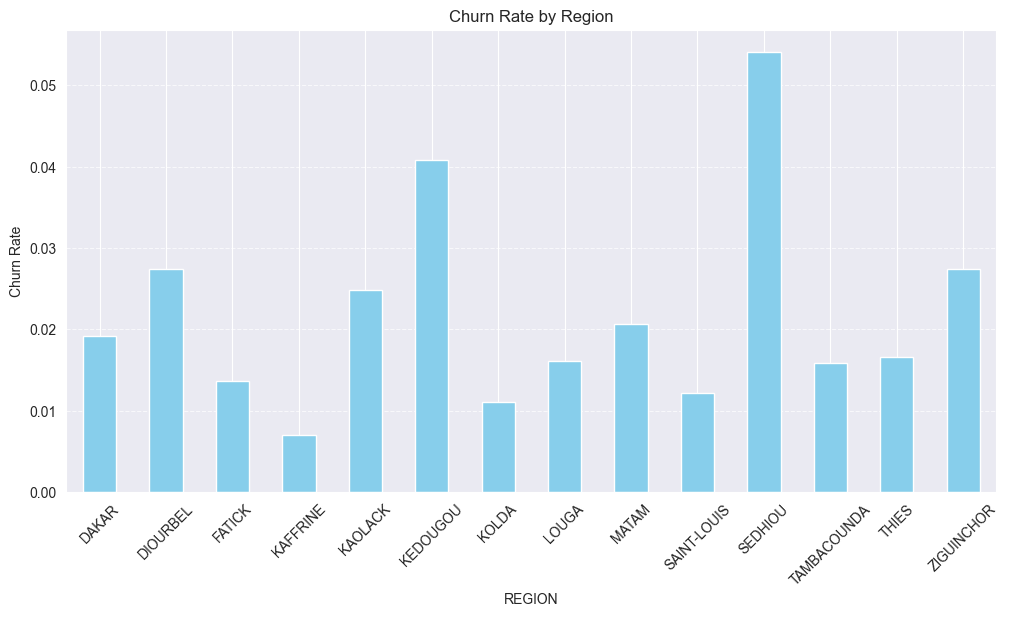

In [31]:
import matplotlib.pyplot as plt

churn_rate_by_region = train.groupby('REGION')['CHURN'].mean()

plt.figure(figsize=(12, 6))
churn_rate_by_region.plot(kind='bar', color='skyblue')
plt.title('Churn Rate by Region')
plt.xlabel('REGION')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


| Code                                                       | Description                                                                                                                                                                                                                                                  |
|------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `pd.crosstab(train.CHURN, train.TENURE, normalize='index')` | Computes a cross-tabulation of two (or more) factors, in this case, 'CHURN' and 'TENURE' columns from the `train` DataFrame. The `normalize='index'` parameter normalizes the result by dividing each value by the sum of values in the same row (along the index). This shows the distribution of 'TENURE' values within each 'CHURN' group, expressed as proportions. |

In [32]:
pd.crosstab(train.CHURN, train.TENURE, normalize= 'index')

TENURE,D 3-6 month,E 6-9 month,F 9-12 month,G 12-15 month,H 15-18 month,I 18-21 month,J 21-24 month,K > 24 month
CHURN,,,,,,,,
0,0.000381,0.000877,0.003953,0.005857,0.010730,0.018637,0.005611,0.953955
1,0.000267,0.000802,0.005669,0.011857,0.017446,0.030625,0.007000,0.926334


This code creates a single figure containing two box plots, visualizing the distribution of two variables (MONTANT and REVENUE) across different churn categories (CHURN).

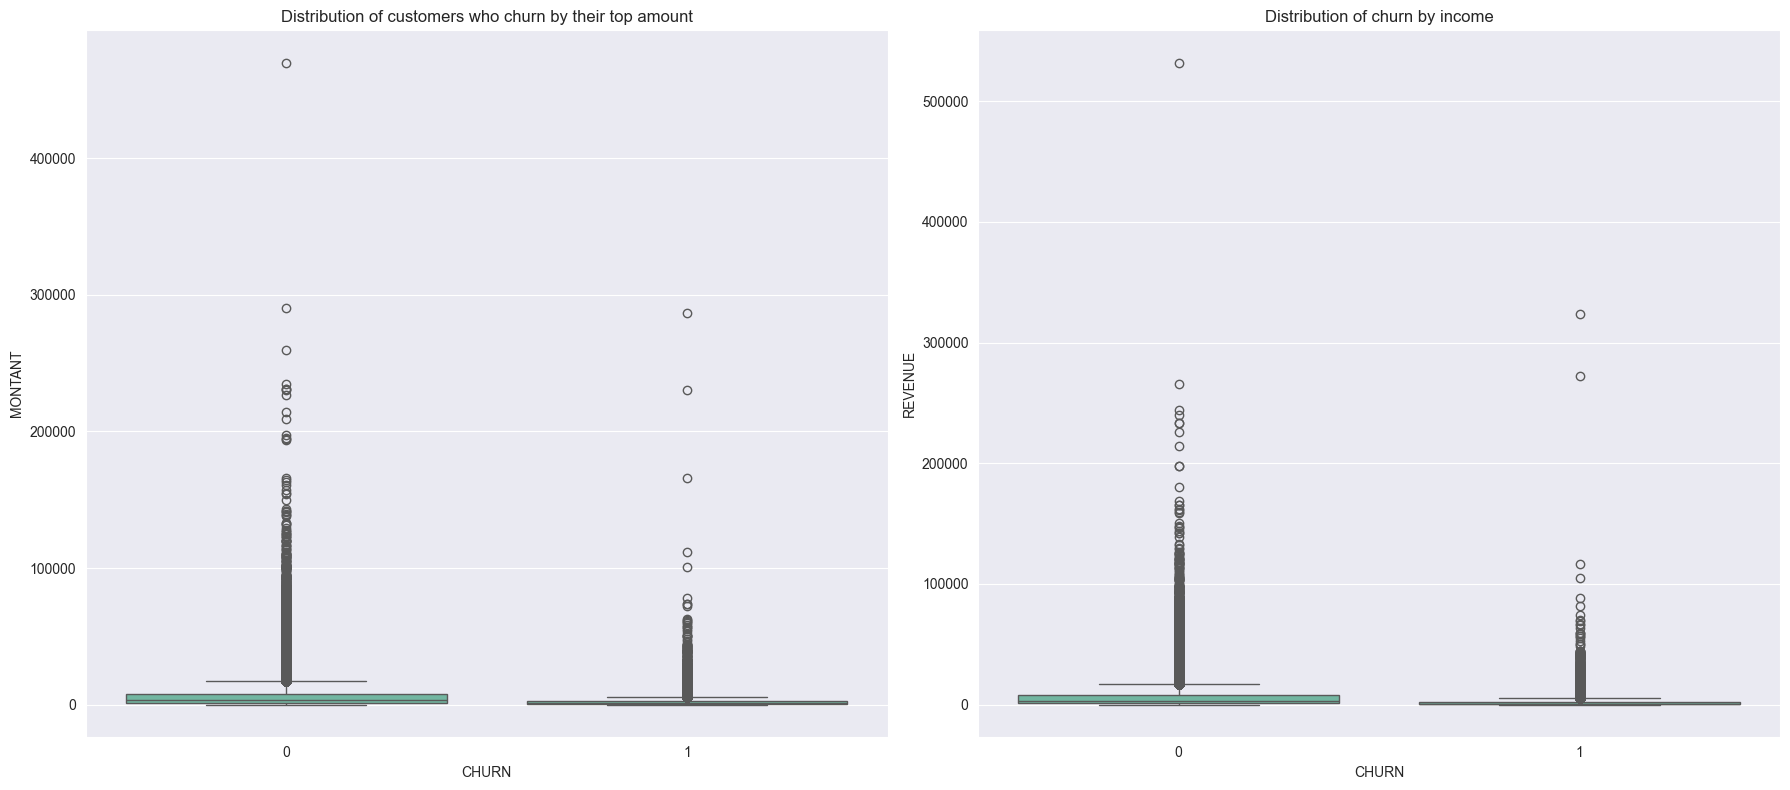

In [33]:
plt.figure(figsize=(18, 8))


plt.subplot(1, 2, 1)
sns.boxplot(x="CHURN", y="MONTANT", data=train)
plt.title('Distribution of customers who churn by their top amount')

plt.subplot(1, 2, 2)
sns.boxplot(x="CHURN", y="REVENUE", data=train)
plt.title('Distribution of churn by income')

plt.tight_layout()
plt.show()


| Code                                                             | Description                                                                                                                                                                                                                                                                                                      |
|------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `train_numeric = train.select_dtypes(include=[np.number])`       | Selects only the columns with numeric data types (e.g., integer, float) from the `train` DataFrame and assigns them to the `train_numeric` DataFrame.                                                                                                                                                          |
| `sns.heatmap(train_numeric.corr(), annot=True)`                 | Creates a heatmap using Seaborn (`sns`) to visualize the correlation matrix of the numeric columns in the `train` DataFrame (`train_numeric`). The `annot=True` parameter adds annotations (numeric values) to the heatmap, showing the correlation coefficients between pairs of columns. |

<Axes: >

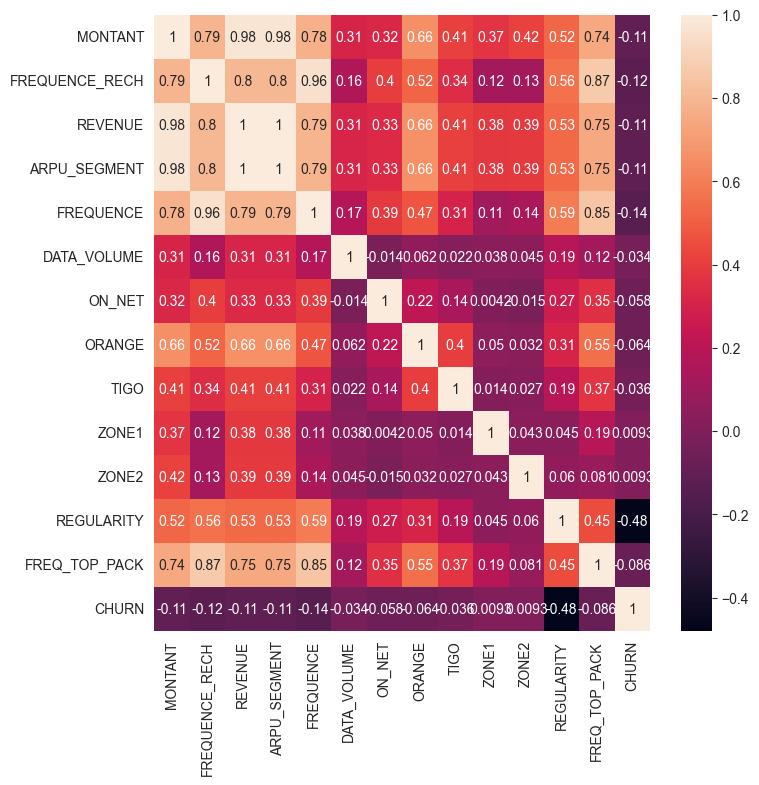

In [34]:
train_numeric = train.select_dtypes(include=[np.number])
sns.heatmap(train_numeric.corr(), annot=True)


| Code                                                | Description                                                                                                                                                                                                               |
|-----------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `print(train['CHURN'].value_counts())`              | Prints the count of unique values in the 'CHURN' column of the `train` DataFrame, showing the distribution of customers who churn (1) and those who don't churn (0).                                                    |
| `train['CHURN'].value_counts(normalize=True).plot(kind='bar')` | Plots the normalized value counts of unique values in the 'CHURN' column of the `train` DataFrame as a bar chart. The `normalize=True` parameter normalizes the counts to show proportions instead of actual counts. |
| `plt.ylabel('counts')`                              | Sets the y-axis label of the plot to 'counts'.                                                                                                                                                                             |
| `plt.xlabel('Churn')`                               | Sets the x-axis label of the plot to 'Churn'.                                                                                                                                                                              |

CHURN
0    875031
1    201993
Name: count, dtype: int64


Text(0.5, 0, 'Churn')

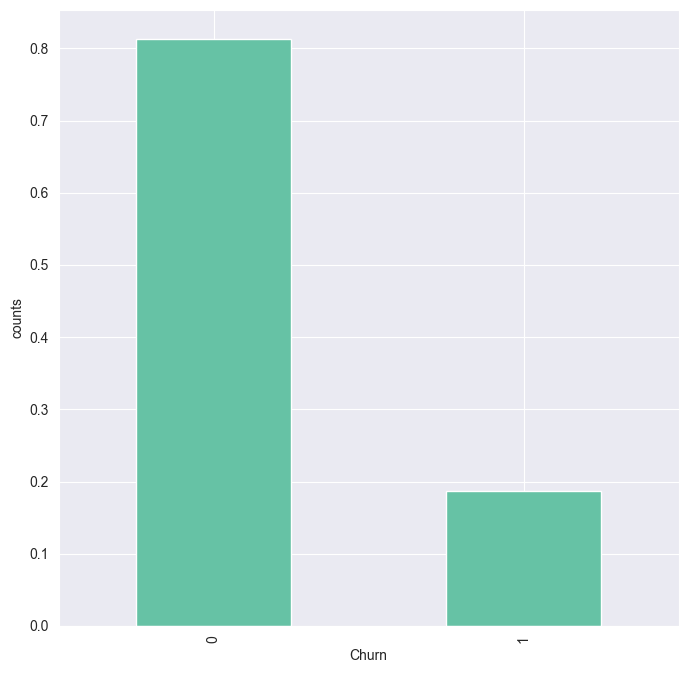

In [35]:
print(train['CHURN'].value_counts())
train['CHURN'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('Churn')

The output indicates that the 'CHURN' column has 875,031 instances of class 0 and 201,993 instances of class 1. This suggests that the dataset is imbalanced, as class 0 significantly outnumbers class 1.

| Code                                                             | Description                                                                                                                                                                                                                               |
|------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `plt.figure(figsize=(10,6))`                                    | Sets the figure size of the plot to (10, 6) inches.                                                                                                                                                                                       |
| `sns.barplot(x='CHURN', y='REGULARITY', data=train)`             | Creates a bar plot using Seaborn (`sns`) showing the distribution of 'REGULARITY' (regularity of recharge) for customers who churn (`CHURN=1`) and those who don't churn (`CHURN=0`) from the `train` DataFrame.                             |
| `plt.title('Distribution of churn by regularity')`               | Sets the title of the plot to 'Distribution of churn by regularity'.                                                                                                                                                                       |

Text(0.5, 1.0, 'Distribution of churn by regularity')

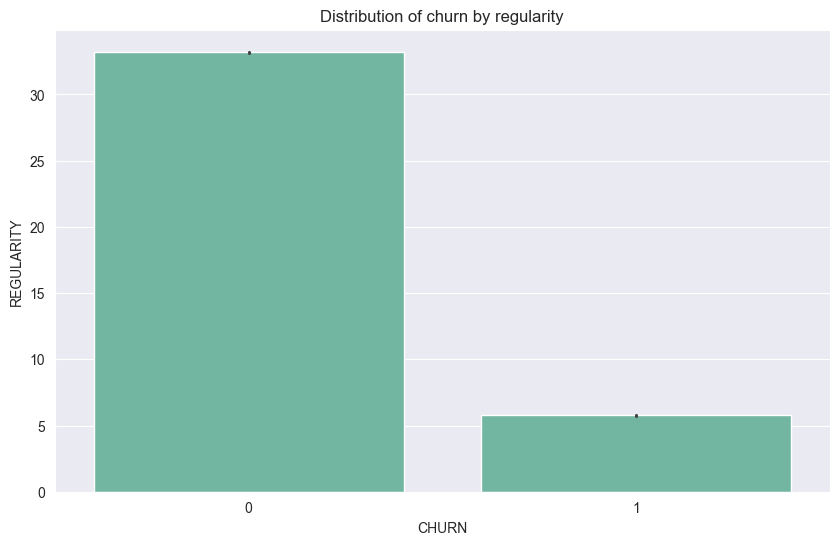

In [36]:
plt.figure(figsize=(10,6))
sns.barplot(x= 'CHURN', y= 'REGULARITY', data= train)
plt.title('Distribution of churn by regularity')

| Code                                                         | Description                                                                                                                                                                      |
|--------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `sns.jointplot(x=train.FREQUENCE_RECH, y=train.REGULARITY, data=train)` | Creates a joint plot using Seaborn (`sns`) to visualize the relationship between 'FREQUENCE_RECH' (frequency of recharge) and 'REGULARITY' (regularity of recharge) columns in the `train` DataFrame. |

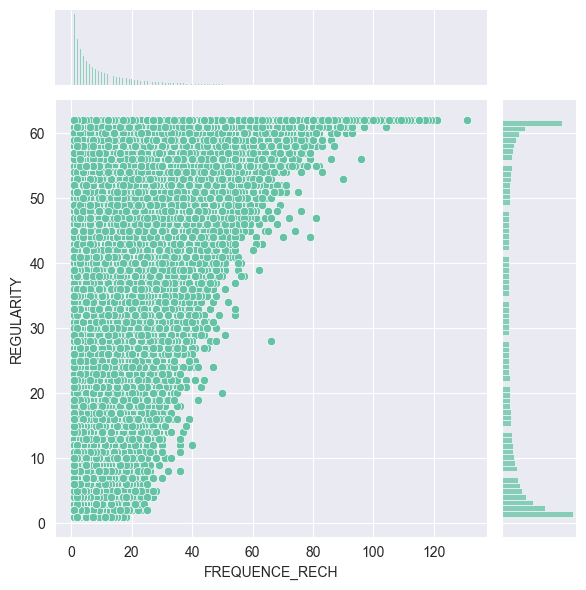

In [37]:
sns.jointplot(x=train.FREQUENCE_RECH, y=train.REGULARITY, data=train)

| Code                                                             | Description                                                                                                                                                                                                                                                                                        |
|------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `train.select_dtypes(include=['int64', 'float64'])`              | Selects columns from the `train` DataFrame that have data types 'int64' or 'float64'.                                                                                                                                                                                                            |
| `.describe().T`                                                  | Computes descriptive statistics for the selected columns (`train.select_dtypes(include=['int64', 'float64'])`) and then transposes the result (swaps rows and columns) for easier reading. The statistics include count, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum values. |

In [38]:
train.select_dtypes(include=['int64', 'float64']).describe().T

,count,mean,std,min,25%,50%,75%,max
MONTANT,699139.0,5529.210895,7104.737952,20.0,1000.0,3000.0,7350.0,470000.0
FREQUENCE_RECH,699139.0,11.523756,13.261938,1.0,2.0,7.0,16.0,131.0
REVENUE,714669.0,5506.050798,7175.625010,1.0,1000.0,3000.0,7360.0,532177.0
ARPU_SEGMENT,714669.0,1835.355961,2391.870902,0.0,333.0,1000.0,2453.0,177392.0
FREQUENCE,714669.0,13.974439,14.687059,1.0,3.0,9.0,20.0,91.0
DATA_VOLUME,547261.0,3368.801722,12898.928039,0.0,0.0,258.0,2905.0,1702309.0
ON_NET,683850.0,277.065798,874.315378,0.0,5.0,27.0,156.0,50809.0
ORANGE,629880.0,95.160804,203.020261,0.0,7.0,29.0,99.0,12040.0
TIGO,432250.0,23.105018,64.035464,0.0,2.0,6.0,20.0,4174.0
ZONE1,84898.0,8.167483,39.245883,0.0,0.0,1.0,3.0,2507.0


| Code                                                             | Description                                                                                                                                                                                                                                                                                                 |
|------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `train.drop(['REGION', 'TOP_PACK', 'MRG'], axis=1, inplace=True)` | Drops the 'REGION', 'TOP_PACK', and 'MRG' columns from the `train` DataFrame along the columns axis (axis=1). The `inplace=True` parameter modifies the `train` DataFrame in place (changes are applied directly to the DataFrame).                                                                      |
| `test.drop(columns=['REGION', 'MRG', 'TOP_PACK'], inplace=True)` | Drops the 'REGION', 'MRG', and 'TOP_PACK' columns from the `test` DataFrame using the `drop` method with the `columns` parameter. The `inplace=True` parameter modifies the `test` DataFrame in place (changes are applied directly to the DataFrame). |

In [39]:
train.drop(['REGION', 'TOP_PACK', 'MRG'], axis=1, inplace=True)
test.drop(columns=['REGION', 'MRG', 'TOP_PACK'], inplace=True)

In [40]:
train.head()

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
0,7ee9e11e342e27c70455960acc80d3f91c1286d1,K > 24 month,20000.0,47.0,21602.0,7201.0,52.0,8835.0,3391.0,396.0,185.0,NaN,NaN,62,30.0,0
1,50443f42bdc92b10388fc56e520e4421a5fa655c,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,0
2,da90b5c1a9b204c186079f89969aa01cb03c91b2,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,0
3,364ec1b424cdc64c25441a444a16930289a0051e,K > 24 month,7900.0,19.0,7896.0,2632.0,25.0,9385.0,27.0,46.0,20.0,NaN,2.0,61,7.0,0
4,d5a5247005bc6d41d3d99f4ef312ebb5f640f2cb,K > 24 month,12350.0,21.0,12351.0,4117.0,29.0,9360.0,66.0,102.0,34.0,NaN,NaN,56,11.0,0


In [41]:
test.head()

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
0,51fe4c3347db1f8571d18ac03f716c41acee30a4,I 18-21 month,2500.0,5.0,2500.0,833.0,5.0,0.0,64.0,70.0,NaN,NaN,NaN,35,5.0
1,5ad5d67c175bce107cc97b98c4e37dcc38aa7f3e,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
2,5a4db591c953a8d8f373877fad37aaf4268899a1,K > 24 month,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,22,NaN
3,8bf9b4d8880aeba1c9a0da48be78f12e629be37c,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN
4,c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df,K > 24 month,5100.0,7.0,5637.0,1879.0,15.0,7783.0,30.0,24.0,0.0,0.0,NaN,60,4.0


| Code                                                             | Description                                                                                                                                                                                                                                                           |
|------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `cols_to_replace = ['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'ZONE1', 'ZONE2', 'FREQ_TOP_PACK']` | Defines a list `cols_to_replace` containing the column names to be used for replacing missing values in both the `train` and `test` DataFrames.                                                                                                                   |
| `train[cols_to_replace] = train[cols_to_replace].fillna(train[cols_to_replace].mean())` | Replaces missing values in the columns specified in `cols_to_replace` in the `train` DataFrame with the mean of each column. The `fillna` method with the `mean()` function calculates the mean of each column and fills missing values with that mean. |
| `test[cols_to_replace] = test[cols_to_replace].fillna(test[cols_to_replace].mean())` | Replaces missing values in the columns specified in `cols_to_replace` in the `test` DataFrame with the mean of each column. The `fillna` method with the `mean()` function calculates the mean of each column and fills missing values with that mean.     |

In [42]:
cols_to_replace = ['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'ZONE1', 'ZONE2', 'FREQ_TOP_PACK']
train[cols_to_replace] = train[cols_to_replace].fillna(train[cols_to_replace].mean())
test[cols_to_replace] = test[cols_to_replace].fillna(test[cols_to_replace].mean())


In [43]:
train.head()

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
0,7ee9e11e342e27c70455960acc80d3f91c1286d1,K > 24 month,20000.000000,47.000000,21602.000000,7201.000000,52.000000,8835.000000,3391.000000,396.000000,185.000000,8.167483,7.709844,62,30.000000,0
1,50443f42bdc92b10388fc56e520e4421a5fa655c,K > 24 month,5529.210895,11.523756,5506.050798,1835.355961,13.974439,3368.801722,277.065798,95.160804,23.105018,8.167483,7.709844,3,9.262446,0
2,da90b5c1a9b204c186079f89969aa01cb03c91b2,K > 24 month,5529.210895,11.523756,5506.050798,1835.355961,13.974439,3368.801722,277.065798,95.160804,23.105018,8.167483,7.709844,1,9.262446,0
3,364ec1b424cdc64c25441a444a16930289a0051e,K > 24 month,7900.000000,19.000000,7896.000000,2632.000000,25.000000,9385.000000,27.000000,46.000000,20.000000,8.167483,2.000000,61,7.000000,0
4,d5a5247005bc6d41d3d99f4ef312ebb5f640f2cb,K > 24 month,12350.000000,21.000000,12351.000000,4117.000000,29.000000,9360.000000,66.000000,102.000000,34.000000,8.167483,7.709844,56,11.000000,0


In [44]:
train.isnull().sum()

user_id           0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
ZONE1             0
ZONE2             0
REGULARITY        0
FREQ_TOP_PACK     0
CHURN             0
dtype: int64

In [45]:
test.head()

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
0,51fe4c3347db1f8571d18ac03f716c41acee30a4,I 18-21 month,2500.000000,5.00000,2500.000000,833.000000,5.00000,0.000000,64.000000,70.000000,22.95227,8.135421,7.696944,35,5.000000
1,5ad5d67c175bce107cc97b98c4e37dcc38aa7f3e,K > 24 month,5506.547759,11.48394,5486.233417,1828.750281,13.93967,3358.421151,281.210613,94.611639,22.95227,8.135421,7.696944,2,9.234326
2,5a4db591c953a8d8f373877fad37aaf4268899a1,K > 24 month,5506.547759,11.48394,5486.233417,1828.750281,13.93967,0.000000,281.210613,94.611639,22.95227,8.135421,7.696944,22,9.234326
3,8bf9b4d8880aeba1c9a0da48be78f12e629be37c,K > 24 month,5506.547759,11.48394,5486.233417,1828.750281,13.93967,3358.421151,281.210613,94.611639,22.95227,8.135421,7.696944,6,9.234326
4,c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df,K > 24 month,5100.000000,7.00000,5637.000000,1879.000000,15.00000,7783.000000,30.000000,24.000000,0.00000,0.000000,7.696944,60,4.000000


In [46]:
test.isnull().sum()

user_id           0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
ZONE1             0
ZONE2             0
REGULARITY        0
FREQ_TOP_PACK     0
dtype: int64

## Machine Learning

Machine learning is a branch of artificial intelligence (AI) that involves developing algorithms and models to enable computers to learn from data without being explicitly programmed. It can be categorized into supervised learning (using labeled data), unsupervised learning (using unlabeled data), and reinforcement learning (learning from rewards or penalties). Machine learning is used in various applications such as natural language processing, computer vision, and recommendation systems across industries like healthcare, finance, and marketing to automate tasks, make predictions, and derive insights from data.

This code prepares data for a machine learning model by separating the target variable (`CHURN`) from the features (`x`), dropping irrelevant columns (`user_id`), and ensuring consistency in features between the training and test datasets. It also performs basic data shape checks to ensure the data is ready for model training.

In [ ]:
dropcols = ['user_id', 'CHURN']
y = train['CHURN']
x = train.drop(columns=dropcols, axis=1)
test = test.drop(columns=['user_id'], axis=1)
print(x.shape)
print(y.shape)
print(test.shape)

(1077024, 14)
(1077024,)
(190063, 14)


| Code                                                                 | Description                                                                                                                                                                                                                                                                                                         |
|----------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=1)` | Splits the features (`x`) and target (`y`) into training and testing sets using the `train_test_split` function from scikit-learn. The `test_size=0.5` parameter specifies that 50% of the data should be used for testing. The `random_state=1` parameter sets the random seed for reproducibility. |
| `print(X_train.shape)`                                               | Prints the shape (number of rows and columns) of the `X_train` DataFrame, which contains the features for training.                                                                                                                                                                                                   |
| `print(y_train.shape)`                                               | Prints the shape (number of elements) of the `y_train` Series, which contains the target variable for training.                                                                                                                                                                                                       |
| `print(X_test.shape)`                                                | Prints the shape (number of rows and columns) of the `X_test` DataFrame, which contains the features for testing.                                                                                                                                                                                                     |
| `print(y_test.shape)`                                                | Prints the shape (number of elements) of the `y_test` Series, which contains the target variable for testing.                                                                                                                                                                                                         |

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.5,random_state=1)
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(538512, 14)
(538512,)
(538512, 14)
(538512,)


| Code                                                                                                                                               | Description                                                                                                                                                                                                                                                                                         |
|----------------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `from imblearn.over_sampling import RandomOverSampler`                                                                                            | Imports the `RandomOverSampler` class from the `imblearn` library, which is used for oversampling the minority class in imbalanced datasets.                                                                                                                                                         |
| `oversampler = RandomOverSampler(random_state=0)`                                                                                                  | Creates an instance of the `RandomOverSampler` class with a specified `random_state` (random seed) for reproducibility.                                                                                                                                                                            |
| `X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)`                                                                | Applies the oversampling technique to the training data (`X_train` and `y_train`) using the `fit_resample` method of the `RandomOverSampler` instance. This method resamples the dataset to balance the class distribution by randomly replicating samples from the minority class until the class distribution is balanced. |


In [ ]:
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=0)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

| Code                                                                                                                                                           | Description                                                                                                                                                                                                                                                                                                         |
|----------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `from imblearn.over_sampling import RandomOverSampler`                                                                                                        | Imports the `RandomOverSampler` class from the `imblearn` library, which is used for oversampling the minority class in imbalanced datasets.                                                                                                                                                                         |
| `from sklearn.model_selection import train_test_split`                                                                                                        | Imports the `train_test_split` function from scikit-learn, which is used to split the data into training and testing sets.                                                                                                                                                                                          |
| `ros = RandomOverSampler(random_state=0)`                                                                                                                     | Creates an instance of the `RandomOverSampler` class with a specified `random_state` (random seed) for reproducibility.                                                                                                                                                                                             |
| `x_resampled, y_resampled = ros.fit_resample(x, y)`                                                                                                           | Applies the oversampling technique to the entire dataset (`x` and `y`) using the `fit_resample` method of the `RandomOverSampler` instance. This method resamples the dataset to balance the class distribution by randomly replicating samples from the minority class until the class distribution is balanced. |
| `X_train, X_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.5, random_state=1)`                                               | Splits the resampled data (`x_resampled` and `y_resampled`) into training and testing sets using the `train_test_split` function. The `test_size=0.5` parameter specifies that 50% of the resampled data should be used for testing. The `random_state=1` parameter sets the random seed for reproducibility. |
| `print(X_train.shape)`                                                                                                                                        | Prints the shape (number of rows and columns) of the `X_train` DataFrame, which contains the features for training.                                                                                                                                                                                                |
| `print(y_train.shape)`                                                                                                                                        | Prints the shape (number of elements) of the `y_train` Series, which contains the target variable for training.                                                                                                                                                                                                    |
| `print(X_test.shape)`                                                                                                                                         | Prints the shape (number of rows and columns) of the `X_test` DataFrame, which contains the features for testing.                                                                                                                                                                                                  |
| `print(y_test.shape)`                                                                                                                                         | Prints the shape (number of elements) of the `y_test` Series, which contains the target variable for testing.                                                                                                                                                                                                      |

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

# Resample the data
ros = RandomOverSampler(random_state=0)
x_resampled, y_resampled = ros.fit_resample(x, y)

X_train, X_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.5, random_state=1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(875031, 14)
(875031,)
(875031, 14)
(875031,)


| Code                                                                                                                                                     | Description                                                                                                                                                                                                                                                                                                         |
|----------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `X_resampled_train, X_resampled_val, y_resampled_train, y_resampled_val = train_test_split(X_train_resampled, y_train_resampled, test_size=0.3, random_state=1)` | Splits the resampled training data (`X_train_resampled` and `y_train_resampled`) into training and validation sets using the `train_test_split` function. The `test_size=0.3` parameter specifies that 30% of the resampled training data should be used for validation. The `random_state=1` parameter sets the random seed for reproducibility. |

In [ ]:
X_resampled_train, X_resampled_val, y_resampled_train, y_resampled_val = train_test_split(X_train_resampled, y_train_resampled, test_size=0.3, random_state=1)


| Code                                                                                                                 | Description                                                                                                                                                                                                                                                                                                         |
|----------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=1)`               | Splits the training data (`X_train` and `y_train`) into training and validation sets using the `train_test_split` function. The `test_size=0.3` parameter specifies that 30% of the training data should be used for validation. The `random_state=1` parameter sets the random seed for reproducibility. |
| `print("Train")`                                                                                                     | Prints a header indicating the start of the training set information.                                                                                                                                                                                                                                              |
| `print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")`                                           | Prints the shape (number of rows and columns) of the training features (`X_train`) and target (`y_train`).                                                                                                                                                                                                        |
| `print("+"*7)`                                                                                                       | Prints a separator line.                                                                                                                                                                                                                                                                                          |
| `print("Test")`                                                                                                      | Prints a header indicating the start of the test set information.                                                                                                                                                                                                                                                   |
| `print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")`                                                | Prints the shape (number of rows and columns) of the test features (`X_test`) and target (`y_test`).                                                                                                                                                                                                              |
| `print("+"*7)`                                                                                                       | Prints a separator line.                                                                                                                                                                                                                                                                                          |
| `print("Validation")`                                                                                                | Prints a header indicating the start of the validation set information.                                                                                                                                                                                                                                            |
| `print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")`                                                    | Prints the shape (number of rows and columns) of the validation features (`X_val`) and target (`y_val`).                                                                                                                                                                                                          |

In [ ]:
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size = 0.3, random_state=1)
print("Train")
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print("+"*7)
print("Test")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")
print("+"*7)
print("Validation")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")


Train
X_train shape: (612521, 14), y_train shape: (612521,)
+++++++
Test
X_test shape: (875031, 14), y_test shape: (875031,)
+++++++
Validation
X_val shape: (262510, 14), y_val shape: (262510,)


| Code                                                                                                                                                  | Description                                                                                                                                                                           |
|-------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `num_cols = ['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'ZONE1', 'ZONE2', 'REGULARITY', 'FREQ_TOP_PACK']` | Defines a list `num_cols` containing the column names that represent numerical features in the dataset. These columns are likely to contain continuous or discrete numerical values. |

In [ ]:
num_cols = ['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE',
       'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'ZONE1', 'ZONE2',
       'REGULARITY', 'FREQ_TOP_PACK']

| Code                                           | Description                                                                                             |
|------------------------------------------------|---------------------------------------------------------------------------------------------------------|
| `scaler = StandardScaler()`                    | Creates an instance of the `StandardScaler` class from scikit-learn, which is used for standardizing   |
|                                                | numerical features by removing the mean and scaling to unit variance.                                    |

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [ ]:
X_train.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
950841,K > 24 month,0.779800,-0.120057,0.772459,0.772250,-0.238282,0.015839,-0.384214,-0.500872,-0.677499,4.644916,-0.001662,1.290594,-0.662017
1447114,K > 24 month,-0.913415,-1.036955,-0.877950,-0.878161,-1.048600,-0.156719,0.026436,-0.742934,-0.558558,-0.001717,-0.001662,-0.305649,-0.925924
1715531,K > 24 month,0.045201,0.054584,0.051537,0.051537,0.062998,0.015839,0.026436,0.024895,0.009532,-0.001717,-0.001662,-0.822081,0.032383
1253463,K > 24 month,-1.019241,-1.151567,-0.980881,-0.980887,-1.149890,-0.157500,0.026436,-0.742934,0.009532,-0.001717,-0.001662,-0.587339,-1.057878
309805,K > 24 month,0.045201,0.054584,0.051537,0.051537,0.062998,0.015839,0.026436,0.024895,0.009532,-0.001717,-0.001662,-0.352597,0.032383


| Code                                                                                                  | Description                                                                                                                                                                                                                                                    |
|-------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `X_test[num_cols] = scaler.transform(X_test[num_cols])`                                               | Transforms the numerical columns specified in `num_cols` of the `X_test` DataFrame using the `transform` method of the `scaler` object. This scales the numerical features in `X_test` to have a mean of 0 and a standard deviation of 1 based on the scaling parameters learned from the training data. |

In [ ]:
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [ ]:
X_test.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
1007238,K > 24 month,0.045201,0.054584,0.051537,0.051537,0.062998,-0.416832,0.026436,0.024895,0.009532,-0.001717,-0.001662,-0.869029,0.032383
615886,K > 24 month,0.045201,0.054584,0.051537,0.051537,0.062998,-0.422953,-0.461638,0.024895,0.009532,-0.001717,-0.001662,-0.493442,0.032383
1039060,K > 24 month,-0.913415,-1.036955,-0.877950,-0.878161,-1.149890,0.015839,-0.452635,-0.371772,-0.647763,-0.001717,-0.001662,1.149749,-0.925924
7712,K > 24 month,0.045201,0.054584,0.051537,0.051537,0.062998,0.015839,0.026436,0.024895,0.009532,-0.001717,-0.001662,-0.681236,0.032383
319548,K > 24 month,-0.712346,-0.005445,-0.703647,-0.703652,-0.136993,-0.192017,-0.470641,-0.726797,0.009532,-0.001717,-0.001662,0.022989,0.129707


In [ ]:
test[num_cols] = scaler.transform(test[num_cols])

In [ ]:
test.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
0,I 18-21 month,-0.595937,-0.693118,-0.568537,-0.568748,-0.846021,-0.422953,-0.357205,-0.178122,0.004990,-0.005115,-0.002757,0.727214,-0.530063
1,K > 24 month,0.040404,0.050021,0.047449,0.047449,0.059476,0.014487,0.033899,0.020463,0.004990,-0.005115,-0.002757,-0.822081,0.028673
2,K > 24 month,0.040404,0.050021,0.047449,0.047449,0.059476,-0.422953,0.033899,0.020463,0.004990,-0.005115,-0.002757,0.116886,0.028673
3,K > 24 month,0.040404,0.050021,0.047449,0.047449,0.059476,0.014487,0.033899,0.020463,0.004990,-0.005115,-0.002757,-0.634287,0.028673
4,K > 24 month,-0.045643,-0.463894,0.078549,0.078545,0.166876,0.590797,-0.418424,-0.549284,-0.677499,-0.867542,-0.002757,1.900923,-0.662017


In [ ]:
X_val[num_cols] = scaler.transform(X_val[num_cols])

In [ ]:
X_val.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
1723322,K > 24 month,0.045201,0.054584,0.051537,0.051537,0.062998,0.015839,0.026436,0.024895,0.009532,-0.001717,-0.001662,-0.775132,0.032383
445504,K > 24 month,-0.860502,-1.151567,-0.826381,-0.826180,-1.149890,0.015839,-0.429228,-0.654178,-0.469353,-0.001717,-0.001662,1.290594,-1.057878
717662,K > 24 month,3.954577,1.942964,3.969107,3.969111,1.787512,0.015839,0.372028,3.388267,0.006409,-0.867542,-0.001662,1.994820,0.525568
934887,H 15-18 month,-1.061571,-1.036955,-1.021930,-1.021729,-1.149890,0.015839,-0.472442,-0.726797,0.009532,-0.001717,-0.001662,-0.164804,0.032383
1280171,K > 24 month,-0.913415,-1.036955,-0.888470,-0.888681,-1.048600,-0.377756,-0.440031,-0.742934,0.009532,-0.001717,-0.571288,-0.681236,-1.057878


| Code                                                                                                                                               | Description                                                                                                                                                                                                                                                                    |
|----------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `encoder = LabelEncoder()`                                                                                                                         | Creates an instance of the `LabelEncoder` class from scikit-learn, which is used for encoding categorical features into numerical values.                                                                                                                                        |
| `X_train["TENURE"] = encoder.fit_transform(X_train["TENURE"])`                                                                                    | Encodes the 'TENURE' column in the training set (`X_train`) into numerical values using the `fit_transform` method of the `encoder` object. The `fit_transform` method both fits the encoder to the data and transforms the data.                                                   |
| `X_test["TENURE"] = encoder.transform(X_test["TENURE"])`                                                                                          | Encodes the 'TENURE' column in the test set (`X_test`) into numerical values using the `transform` method of the `encoder` object. The `transform` method only transforms the data based on the encoding learned from the training data.                                    |
| `test['TENURE'] = encoder.transform(test["TENURE"])`                                                                                              | Encodes the 'TENURE' column in the `test` DataFrame into numerical values using the `transform` method of the `encoder` object. This ensures consistency in encoding across the training, validation, and test datasets based on the encoding learned from the training data. |

In [ ]:
encoder = LabelEncoder()
X_train["TENURE"] = encoder.fit_transform(X_train["TENURE"])

In [ ]:
X_test["TENURE"] = encoder.transform(X_test["TENURE"])

In [ ]:
test['TENURE'] = encoder.transform(test["TENURE"])

In [ ]:
X_train.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
950841,7,0.779800,-0.120057,0.772459,0.772250,-0.238282,0.015839,-0.384214,-0.500872,-0.677499,4.644916,-0.001662,1.290594,-0.662017
1447114,7,-0.913415,-1.036955,-0.877950,-0.878161,-1.048600,-0.156719,0.026436,-0.742934,-0.558558,-0.001717,-0.001662,-0.305649,-0.925924
1715531,7,0.045201,0.054584,0.051537,0.051537,0.062998,0.015839,0.026436,0.024895,0.009532,-0.001717,-0.001662,-0.822081,0.032383
1253463,7,-1.019241,-1.151567,-0.980881,-0.980887,-1.149890,-0.157500,0.026436,-0.742934,0.009532,-0.001717,-0.001662,-0.587339,-1.057878
309805,7,0.045201,0.054584,0.051537,0.051537,0.062998,0.015839,0.026436,0.024895,0.009532,-0.001717,-0.001662,-0.352597,0.032383


| Code                                                                                                                                                       | Description                                                                                                                                                                                                                                        |
|------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `model_table = pd.DataFrame(columns=['Model', 'Accuracy', 'Recall', 'F1 Score'])`                                                                           | Creates an empty DataFrame `model_table` with columns for 'Model', 'Accuracy', 'Recall', and 'F1 Score'. This DataFrame will be used to store the evaluation metrics for each model.                                                               |
| `def model_evaluation(model_name, model, X_train, y_train, X_test, y_test):`                                                                                 | Defines a function `model_evaluation` that takes the model name, model object, training features (`X_train`), training target (`y_train`), test features (`X_test`), and test target (`y_test`) as input. This function evaluates the model and stores the evaluation metrics in the `model_table`. |
| `model.fit(X_train, y_train)`                                                                                                                             | Trains the model on the training data (`X_train` and `y_train`).                                                                                                                                                                                   |
| `y_pred = model.predict(X_test)`                                                                                                                           | Makes predictions on the test data (`X_test`) using the trained model.                                                                                                                                                                             |
| `accuracy = accuracy_score(y_test, y_pred)`                                                                                                                 | Calculates the accuracy of the model predictions on the test data.                                                                                                                                                                                 |
| `recall = recall_score(y_test, y_pred)`                                                                                                                     | Calculates the recall (sensitivity) of the model predictions on the test data.                                                                                                                                                                     |
| `f1 = f1_score(y_test, y_pred)`                                                                                                                            | Calculates the F1 score of the model predictions on the test data.                                                                                                                                                                                 |
| `model_table.loc[model_name] = [model_name, accuracy, recall, f1]`                                                                                         | Adds a new row to the `model_table` DataFrame with the model name, accuracy, recall, and F1 score.                                                                                                                                                  |
| `print(f"Model: {model_name}")`                                                                                                                            | Prints the name of the model.                                                                                                                                                                                                                      |
| `print(f"Accuracy: {accuracy}")`                                                                                                                           | Prints the accuracy of the model predictions.                                                                                                                                                                                                      |
| `print(f"Recall: {recall}")`                                                                                                                               | Prints the recall of the model predictions.                                                                                                                                                                                                        |
| `print(f"F1 Score: {f1}")`                                                                                                                                 | Prints the F1 score of the model predictions.                                                                                                                                                                                                      |
| `print(classification_report(y_test, y_pred))`                                                                                                              | Prints a classification report, which includes precision, recall, F1-score, and support for each class, based on the actual and predicted target values.                                                                                         |
| `return model`                                                                                                                                              | Returns the trained model object.                                                                                                                                                                                                                  |
| `model = RandomForestClassifier(n_estimators=100, random_state=1)`                                                                                         | Creates an instance of the `RandomForestClassifier` class from scikit-learn with 100 estimators and a random state of 1.                                                                                                                           |
| `model = model_evaluation('Random Forest', model, X_train, y_train, X_test, y_test)`                                                                         | Calls the `model_evaluation` function with the model name, model object, training features (`X_train`), training target (`y_train`), test features (`X_test`), and test target (`y_test`). This evaluates the model and stores the evaluation metrics in the `model_table`.              |

In [ ]:
model_table = pd.DataFrame(columns=['Model', 'Accuracy', 'Recall', 'F1 Score'])
def model_evaluation(model_name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    model_table.loc[model_name] = [model_name, accuracy, recall, f1]
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(classification_report(y_test, y_pred))
    
    return model

model = RandomForestClassifier(n_estimators=100, random_state=1)
model = model_evaluation('Random Forest', model, X_train, y_train, X_test, y_test)




Model: Random Forest
Accuracy: 0.8761655301355038
Recall: 0.9390683541990313
F1 Score: 0.883542173362122
              precision    recall  f1-score   support

           0       0.93      0.81      0.87    437311
           1       0.83      0.94      0.88    437720

    accuracy                           0.88    875031
   macro avg       0.88      0.88      0.88    875031
weighted avg       0.88      0.88      0.88    875031



| Code                                                                                                                                               | Description                                                                                                                                                                                                                                        |
|----------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `from catboost import CatBoostClassifier`                                                                                                         | Imports the `CatBoostClassifier` class from the CatBoost library, which is a gradient boosting library that supports categorical features without the need for one-hot encoding.                                                                  |
| `cat = [0]`                                                                                                                                        | Initializes a list `cat` containing the index (0) of the categorical feature(s) in the dataset.                                                                                                                                                   |
| `model = CatBoostClassifier(iterations=10)`                                                                                                       | Creates an instance of the `CatBoostClassifier` class with 10 iterations. The `iterations` parameter specifies the number of boosting iterations (trees) to be performed during the training process.                                             |
| `model = model_evaluation('CatBoost', model, X_train, y_train, X_test, y_test)`                                                                    | Calls the `model_evaluation` function with the model name ('CatBoost'), model object, training features (`X_train`), training target (`y_train`), test features (`X_test`), and test target (`y_test`). This evaluates the CatBoost model and stores the evaluation metrics in the `model_table`. |


In [ ]:
from catboost import CatBoostClassifier
cat = [0]
model = CatBoostClassifier(iterations=10)
model = model_evaluation('CatBoost', model, X_train, y_train, X_test, y_test)

Learning rate set to 0.5
0:	learn: 0.5083538	total: 351ms	remaining: 3.16s
1:	learn: 0.4459195	total: 576ms	remaining: 2.3s
2:	learn: 0.4182716	total: 687ms	remaining: 1.6s
3:	learn: 0.4058486	total: 781ms	remaining: 1.17s
4:	learn: 0.3994437	total: 891ms	remaining: 891ms
5:	learn: 0.3963793	total: 1s	remaining: 670ms
6:	learn: 0.3949018	total: 1.11s	remaining: 477ms
7:	learn: 0.3935311	total: 1.22s	remaining: 304ms
8:	learn: 0.3929984	total: 1.35s	remaining: 150ms
9:	learn: 0.3924428	total: 1.45s	remaining: 0us
Model: CatBoost
Accuracy: 0.8272986899892689
Recall: 0.8522160285113771
F1 Score: 0.8315627915375126
              precision    recall  f1-score   support

           0       0.84      0.80      0.82    437311
           1       0.81      0.85      0.83    437720

    accuracy                           0.83    875031
   macro avg       0.83      0.83      0.83    875031
weighted avg       0.83      0.83      0.83    875031



| Code                                                                                                                   | Description                                                                                                                                                                                                                                        |
|------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `from xgboost import XGBClassifier`                                                                                    | Imports the `XGBClassifier` class from the XGBoost library, which is an implementation of the gradient boosting algorithm.                                                                                                                       |
| `model = XGBClassifier()`                                                                                              | Creates an instance of the `XGBClassifier` class, which represents the XGBoost classifier model.                                                                                                                                                  |
| `model = model_evaluation('XGBoost', model, X_train, y_train, X_test, y_test)`                                        | Calls the `model_evaluation` function with the model name ('XGBoost'), model object, training features (`X_train`), training target (`y_train`), test features (`X_test`), and test target (`y_test`). This evaluates the XGBoost model and stores the evaluation metrics in the `model_table`. |


In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
model = model_evaluation('XGBoost', model, X_train, y_train, X_test, y_test)


Model: XGBoost
Accuracy: 0.8307465678358824
Recall: 0.8640592159371288
F1 Score: 0.836267072326745
              precision    recall  f1-score   support

           0       0.85      0.80      0.82    437311
           1       0.81      0.86      0.84    437720

    accuracy                           0.83    875031
   macro avg       0.83      0.83      0.83    875031
weighted avg       0.83      0.83      0.83    875031



In [ ]:
model = DecisionTreeClassifier()
model = model_evaluation('Decision Tree', model, X_train, y_train, X_test, y_test)

Model: Decision Tree
Accuracy: 0.8542554492355128
Recall: 0.9386617015443662
F1 Score: 0.8656540320856064
              precision    recall  f1-score   support

           0       0.93      0.77      0.84    437311
           1       0.80      0.94      0.87    437720

    accuracy                           0.85    875031
   macro avg       0.86      0.85      0.85    875031
weighted avg       0.86      0.85      0.85    875031



| Code                                                                                                                   | Description                                                                                                                                                                                                                               |
|------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `model_table = model_table.sort_values(by='F1 Score', ascending=False)`                                                | Sorts the `model_table` DataFrame by the 'F1 Score' column in descending order (from highest to lowest F1 score). The `ascending=False` parameter specifies the sorting order.                                                          |
| `model_table`                                                                                                          | Displays the sorted `model_table` DataFrame, showing the models along with their corresponding accuracy, recall, and F1 score, sorted by F1 score in descending order.                                                                    |

In [ ]:
model_table = model_table.sort_values(by='F1 Score', ascending=False)
model_table

,Model,Accuracy,Recall,F1 Score
Random Forest,Random Forest,0.876166,0.939068,0.883542
Decision Tree,Decision Tree,0.854255,0.938662,0.865654
XGBoost,XGBoost,0.830747,0.864059,0.836267
CatBoost,CatBoost,0.827299,0.852216,0.831563


Among these models, CatBoost and XGBoost performed similarly in terms of Accuracy and F1 Score, with CatBoost showing slightly better results in Recall. Random Forest performed slightly worse than CatBoost and XGBoost in terms of Accuracy but had a higher Recall. Decision Tree had the lowest performance across all metrics.

## Model Fitting

In [ ]:
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train_resampled, y_train_resampled)


In [ ]:
joblib.dump(RandomForestClassifier(n_estimators=100, random_state=1), 'Models\\random_forest_model.pkl')

['Models\\decision_tree_model.pkl']

In [ ]:
joblib.dump(encoder, 'Models\\encoder.pkl')
joblib.dump(scaler, 'Models\\scaler.pkl')


['Models\\scaler.pkl']

In [ ]:
submission.head()

,user_id,CHURN
0,51fe4c3347db1f8571d18ac03f716c41acee30a4,0
1,5ad5d67c175bce107cc97b98c4e37dcc38aa7f3e,0
2,5a4db591c953a8d8f373877fad37aaf4268899a1,0
3,8bf9b4d8880aeba1c9a0da48be78f12e629be37c,0
4,c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df,0


In [ ]:
test.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
0,5,-0.595937,-0.693118,-0.568537,-0.568748,-0.846021,-0.422953,-0.357205,-0.178122,0.004990,-0.005115,-0.002757,0.727214,-0.530063
1,7,0.040404,0.050021,0.047449,0.047449,0.059476,0.014487,0.033899,0.020463,0.004990,-0.005115,-0.002757,-0.822081,0.028673
2,7,0.040404,0.050021,0.047449,0.047449,0.059476,-0.422953,0.033899,0.020463,0.004990,-0.005115,-0.002757,0.116886,0.028673
3,7,0.040404,0.050021,0.047449,0.047449,0.059476,0.014487,0.033899,0.020463,0.004990,-0.005115,-0.002757,-0.634287,0.028673
4,7,-0.045643,-0.463894,0.078549,0.078545,0.166876,0.590797,-0.418424,-0.549284,-0.677499,-0.867542,-0.002757,1.900923,-0.662017


In [ ]:
subpred = model.predict(test)

In [ ]:
submission["CHURN"] = subpred

In [ ]:
submission.head()

,user_id,CHURN
0,51fe4c3347db1f8571d18ac03f716c41acee30a4,0
1,5ad5d67c175bce107cc97b98c4e37dcc38aa7f3e,1
2,5a4db591c953a8d8f373877fad37aaf4268899a1,0
3,8bf9b4d8880aeba1c9a0da48be78f12e629be37c,1
4,c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df,0


In [ ]:
submission.to_csv('starter_code_submission.csv', index=False)